## TO DO:
* Figure out if always the second cluster 
* Get it to figure out which mdoel is best
* set random state
* make it faster!

In [1]:
import os
import pandas
import numpy as np
import nibabel as ni
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.distributions.empirical_distribution as ed
from glob import glob
from scipy.io import savemat, loadmat
from matplotlib import mlab
from nilearn import image, input_data
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.mixture import GaussianMixture

In [2]:
wdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images'
ans = sorted(glob(os.path.join(wdir,'amyloid_negative/smoothed/*')))
aps = sorted(glob(os.path.join(wdir,'amyloid_positive/smoothed/*')))
s_scans = ans+aps
ica_scans = sorted(glob(os.path.join(wdir,'smoothed_ICA_regressed_scans/*')))
wtd_scans = sorted(glob(os.path.join(wdir,'smoothed_weighted_by_amyloid_T_test_scans/*')))
wi_scans = sorted(glob(os.path.join(wdir,'smoothed_weighted_and_ICA_regress_images/*')))
dkt = '/data1/users/jvogel/ADNI_tau/dkt_atlas_1p5mm.nii'

In [352]:
ica_scans2 = sorted(glob(os.path.join(wdir,'smoothed_ICA_regressed_scans_2/*')))

In [297]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


In [263]:
pdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_roi_data.csv')
pdf.drop(pdf.columns[78:],axis=1,inplace=True)
pdf.head()

roi_1     roi_2     roi_3     roi_4     roi_5     roi_6     roi_7  \
0  0.701645  0.676591  0.461776  0.527256  0.372574  0.447080  0.443195   
1  0.564308  0.368153  0.656585  0.700573  0.654706  0.371894  0.467564   
2  0.789790  0.348759  0.730640  0.247916  0.467068  0.314607  0.257625   
3  0.529252  0.641854  0.545657  0.226188  0.319547  0.379725  0.347738   
4  0.443489  0.390835  0.487892  0.535985  0.256538  0.561640  0.295780   

      roi_8     roi_9    roi_10    ...       roi_69    roi_70    roi_71  \
0  0.408220  0.321967  0.628237    ...     0.779303  0.569502  0.176098   
1  0.825658  0.383969  0.610331    ...     0.181682  0.662550  0.686077   
2  0.584427  0.629005  0.484974    ...     0.741756  0.577083  0.915049   
3  0.465418  0.398971  0.391503    ...     0.850852  0.514655  0.728162   
4  0.377131  0.640701  0.484316    ...     0.572651  0.349538  0.230229   

     roi_72    roi_73    roi_74    roi_75    roi_76    roi_77    roi_78  
0  0.706148  0.457584  0.541927  0.424773  0.524714  0.518405  0.616898  
1  0.496544  0.859984  0.496997  0.709937  0.673838  0.743749  0.719969  
2  0.426398  0.457865  0.892730  0.382639  0.898133  0.846154  0.700073  
3  0.440800  0.469000  0.765215  0.547062  0.757598  0.712874  0.642555  
4  0.403451  0.376962  0.425333  0.338289  0.388638  0.370255  0.377717  

[5 rows x 78 columns]

In [267]:
sorter = pandas.DataFrame(pdf,copy=True)
sorter.loc[:,'mean'] = pdf.mean(axis=1)
sorter.sort_values('mean',axis=0)
sorter2 = pandas.DataFrame(pdf,copy=True)
sorter2.loc['mean',:] = pdf.mean(axis=0)


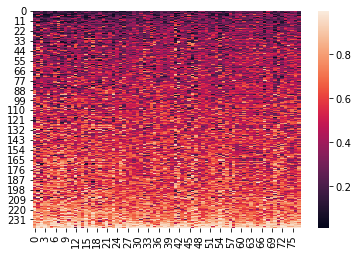

In [271]:
plt.close()
sns.heatmap(pdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [316]:
files_in = ica_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_ica_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


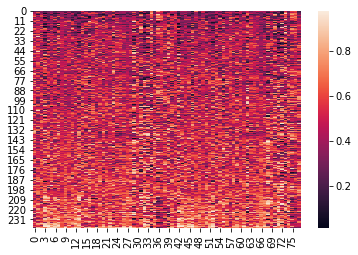

In [317]:
pdf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_ica_regr_roi_data.csv')
pdf_ica.drop(pdf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_ica,copy=True)
sorter.loc[:,'mean'] = pdf_ica.mean(axis=1)
plt.close()
sns.heatmap(pdf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [318]:
files_in = wtd_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_am_t_wtd'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


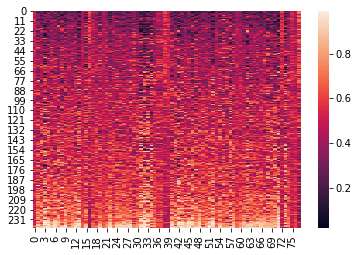

In [319]:
pdf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_am_t_wtd_roi_data.csv')
pdf_wtd.drop(pdf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_wtd,copy=True)
sorter.loc[:,'mean'] = pdf_wtd.mean(axis=1)
plt.close()
sns.heatmap(pdf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [320]:
files_in = wi_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_wtd_and_ICA'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


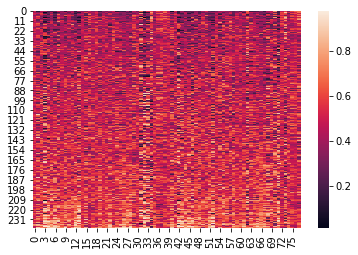

In [321]:
pdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_wtd_and_ICA_roi_data.csv')
pdf_wi.drop(pdf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_wi,copy=True)
sorter.loc[:,'mean'] = pdf_wi.mean(axis=1)
plt.close()
sns.heatmap(pdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

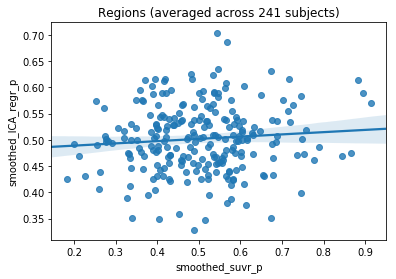

0.00780811241562


In [324]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_ica.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_ICA_regr_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_ica.mean(axis=1))[0]**2)

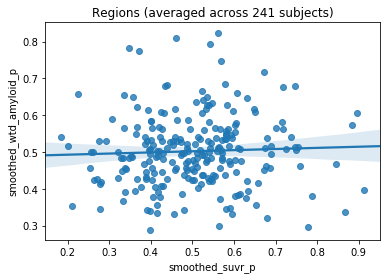

0.00180952590329


In [325]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_wtd.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_wtd_amyloid_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_wtd.mean(axis=1))[0]**2)

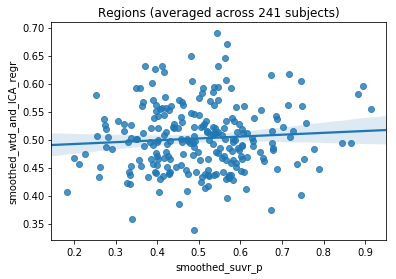

0.00563950151614


In [326]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_wi.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_wtd_and_ICA_regr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_wi.mean(axis=1))[0]**2)

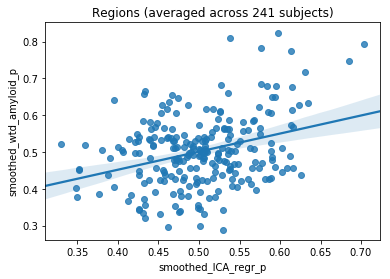

0.107124657319


In [327]:
plt.close()
sns.regplot(pdf_ica.mean(axis=1),pdf_wtd.mean(axis=1))
plt.xlabel('smoothed_ICA_regr_p')
plt.ylabel('smoothed_wtd_amyloid_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf_ica.mean(axis=1),pdf_wtd.mean(axis=1))[0]**2)

In [3]:
tdf = pandas.read_csv('/data1/users/jvogel/ADNI_tau/big_tau.csv',index_col = 0)
idf = pandas.read_csv('/data1/users/jvogel/ADNI_tau/template_space/tau_images/ica_values_basic_IC20_smoothed.csv')

In [90]:
tdf.columns

Index(['ID', 'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', '5_Sensory', 'Hipp_OffTarget', 'Hipp_EarlyTau',
       'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45', 'CDRSB', 'ADAS11',
       'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA',
       'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'whole_hippocampus_AV1451',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [91]:
idf.columns

Index(['subject', 'visit', 'ica_0', 'ica_1', 'ica_2', 'ica_3', 'ica_4',
       'ica_5', 'ica_6', 'ica_7', 'ica_8', 'ica_9', 'ica_10', 'ica_11',
       'ica_12', 'ica_13', 'ica_14', 'ica_15', 'ica_16', 'ica_17', 'ica_18',
       'ica_19', 'amyloid_status'],
      dtype='object')

In [27]:
for i,row in idf.iterrows():
    dx = tdf[(tdf.ID == row['subject']) & (tdf.visit == row['visit'])]['DX_fill'].values
    if len(dx) > 0:
        idf.loc[i,'DX'] = dx[0]

In [329]:
neg_index = idf[(idf.amyloid_status==0) & (idf.DX == 'NL')].index.tolist()

In [330]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_vx_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


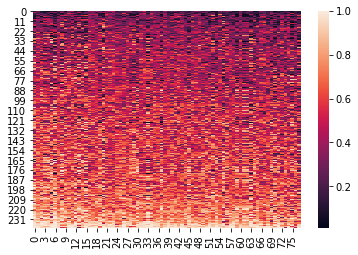

In [299]:
rpdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_vx_anmeg_NL_ref_roi_data.csv')
rpdf.drop(rpdf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf,copy=True)
sorter.loc[:,'mean'] = rpdf.mean(axis=1)
sorter2 = pandas.DataFrame(rpdf,copy=True)
sorter2.loc['mean',:] = rpdf.mean(axis=0)
plt.close()
sns.heatmap(rpdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [300]:
for col in rpdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, rpdf[col].mean())

roi_72 [' Amygdala'] 0.565688764217
roi_23 [' Precuneus'] 0.564615171615
roi_53 [' Parahippocampal'] 0.563234737297
roi_47 [' Isthmus cingulate'] 0.556851581562
roi_8 [' Isthmus cingulate'] 0.55585600305
roi_63 [' Rostral anterior cingulate'] 0.555638614432
roi_33 [' Amygdala'] 0.551124383327
roi_62 [' Precuneus'] 0.550818365751
roi_35 [' Caudate'] 0.55052901563
roi_75 [' Hippocampus'] 0.549919492929
roi_44 [' fusiform'] 0.548943578529
roi_16 [' Pars opercularis'] 0.546020021163
roi_14 [' Parahippocampal'] 0.545656332358
roi_74 [' Caudate'] 0.545131818136
roi_36 [' Hippocampus'] 0.54473938652
roi_69 [' Transverse temporal'] 0.544233893498
roi_41 [' Caudal middle frontal'] 0.542537993859
roi_27 [' Superior parietal'] 0.542246903513
roi_52 [' Middle temporal'] 0.540171920611
roi_60 [' Posterior cingulate'] 0.537686997521
roi_30 [' Transverse temporal'] 0.536833841922
roi_59 [' Postcentral'] 0.536532900076
roi_29 [' Supramarginal'] 0.535420376718
roi_68 [' Supramarginal'] 0.534721139181
r

In [332]:
files_in = ica_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_ICA_regr_vx_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


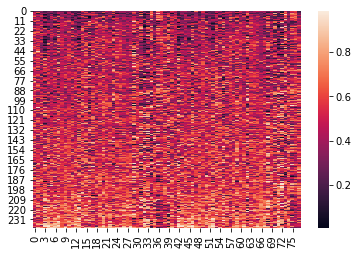

In [333]:
rpdf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_regr_vx_anmeg_NL_ref_roi_data.csv')
rpdf_ica.drop(rpdf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_ica,copy=True)
sorter.loc[:,'mean'] = rpdf_ica.mean(axis=1)
plt.close()
sns.heatmap(rpdf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [334]:
files_in = wtd_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_wtd_am_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


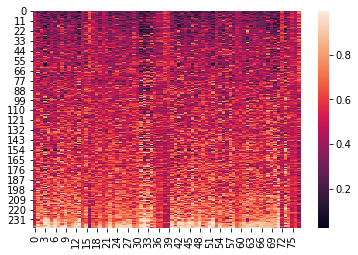

In [340]:
rpdf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_wtd_am_anmeg_NL_ref_roi_data.csv')
rpdf_wtd.drop(rpdf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_wtd,copy=True)
sorter.loc[:,'mean'] = rpdf_wtd.mean(axis=1)
plt.close()
sns.heatmap(rpdf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [341]:
files_in = wi_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_ICA_wtd_am_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


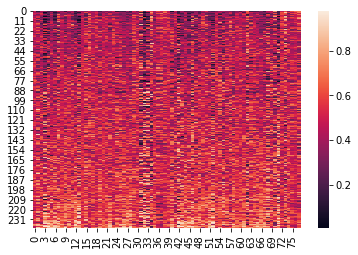

In [342]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
rpdf_wi.drop(rpdf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

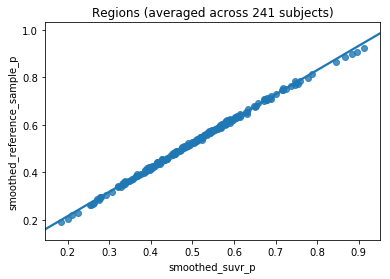

0.998434854982


In [344]:
plt.close()
sns.regplot(pdf.mean(axis=1),rpdf.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_reference_sample_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),rpdf.mean(axis=1))[0]**2)

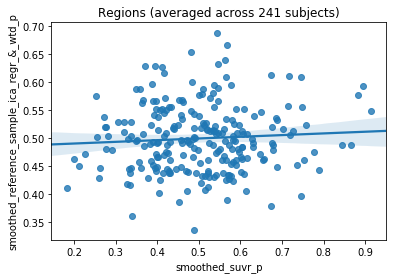

0.00456383594133


In [346]:
plt.close()
sns.regplot(pdf.mean(axis=1),rpdf_wi.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_reference_sample_ica_regr_&_wtd_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),rpdf_wi.mean(axis=1))[0]**2)

In [360]:
dfs = {'suvr': pdf,'ica': pdf_ica, 'weighted': pdf_wtd, 'ICA+weighted': pdf_wi,
      'suvr+refsample': rpdf, 'ica+refsample': rpdf_ica, 'weight+refsample': rpdf_wtd, 'ICA+weighted+refsample':rpdf_wi}

for k,df in dfs.items():
    df.loc[:,'amyloid'] = idf.amyloid_status.values
    df.loc[:,'DX'] = idf.DX.values
    print('for',k)
    thits = []
    fhits = []
    for i,col in enumerate(df.columns[:78]):
        t,p = stats.ttest_ind(df[df.amyloid==0][col],
                            df[df.amyloid==1][col])
        if p < 0.05:
            thits.append(i)
        f,p2 = stats.f_oneway(df[df.DX=='NL'][col],
                              df[df.DX=='MCI'][col],
                              df[df.DX=='Dementia'][col])
        if p < 0.05:
            fhits.append(i)
    print('%s regions were different by amyloid group'%len(thits))
    print(thits)
    print('%s regions were different by disease group'%len(fhits))
    print(fhits)

for suvr
39 regions were different by amyloid group
[1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 19, 22, 24, 25, 26, 27, 28, 32, 35, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 58, 61, 63, 64, 65, 67, 71, 74, 77]
39 regions were different by disease group
[1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 19, 22, 24, 25, 26, 27, 28, 32, 35, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 58, 61, 63, 64, 65, 67, 71, 74, 77]
for ica
10 regions were different by amyloid group
[3, 21, 30, 32, 34, 38, 47, 49, 53, 77]
10 regions were different by disease group
[3, 21, 30, 32, 34, 38, 47, 49, 53, 77]
for weighted
13 regions were different by amyloid group
[3, 5, 6, 10, 29, 36, 37, 38, 45, 49, 55, 56, 77]
13 regions were different by disease group
[3, 5, 6, 10, 29, 36, 37, 38, 45, 49, 55, 56, 77]
for ICA+weighted
12 regions were different by amyloid group
[3, 29, 30, 32, 34, 36, 37, 38, 45, 47, 49, 77]
12 regions were different by disease group
[3, 29, 30, 32, 34, 36, 37, 38, 45, 47, 49, 77]
for suvr+refsample
32 regions wer

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


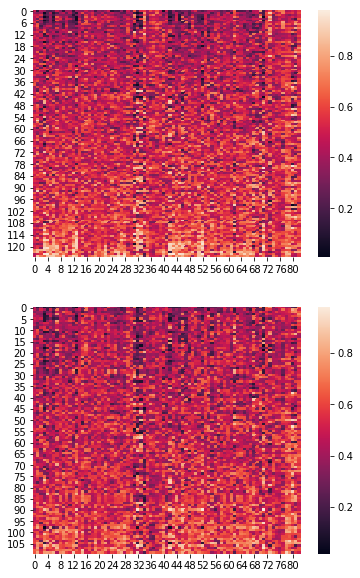

In [349]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,10))
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.amyloid==0].values,ax=ax1)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.amyloid==1].values,ax=ax2)
plt.show()

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


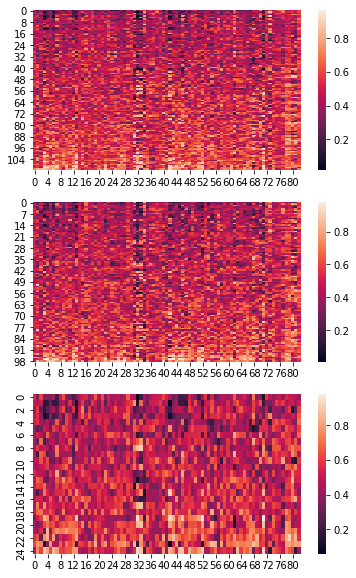

In [350]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(6,10))
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='NL'].values,ax=ax1)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='MCI'].values,ax=ax2)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='Dementia'].values,ax=ax3)
plt.show()

In [202]:
files_in = s_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_SUVR'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


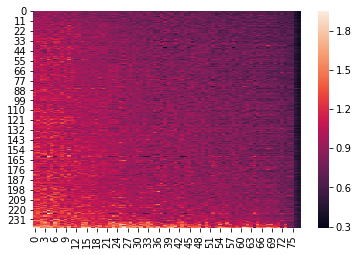

In [13]:
ndf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_SUVR_roi_data.csv')
ndf.drop(ndf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf,copy=True)
sorter.loc[:,'mean'] = ndf.mean(axis=1)
sorter2 = pandas.DataFrame(ndf,copy=True)
sorter2.loc['mean',:] = ndf.mean(axis=0)
plt.close()
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [236]:
files_in = ica_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_ICA_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


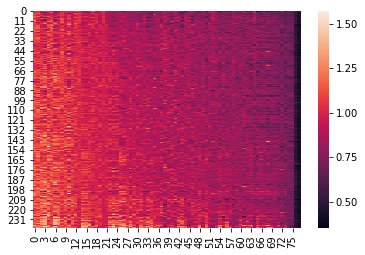

In [70]:
ndf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_ICA_regr_roi_data.csv')
ndf_ica.drop(ndf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_ica,copy=True)
sorter.loc[:,'mean'] = ndf_ica.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_ica,copy=True)
sorter2.loc['mean',:] = ndf_ica.mean(axis=0)
plt.close()
sns.heatmap(ndf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [354]:
files_in = ica_scans2
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_ICA_regr_2'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


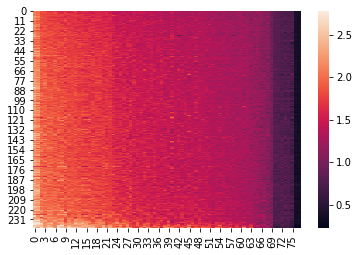

In [69]:
ndf_ica2 = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_ICA_regr_2_roi_data.csv')
ndf_ica2.drop(ndf_ica2.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_ica2,copy=True)
sorter.loc[:,'mean'] = ndf_ica2.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_ica2,copy=True)
sorter2.loc['mean',:] = ndf_ica2.mean(axis=0)
plt.close()
sns.heatmap(ndf_ica2.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [239]:
files_in = wtd_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_wtd_amyloid'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


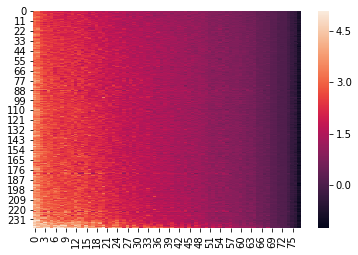

In [68]:
ndf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_wtd_amyloid_roi_data.csv')
ndf_wtd.drop(ndf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_wtd,copy=True)
sorter.loc[:,'mean'] = ndf_wtd.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_wtd,copy=True)
sorter2.loc['mean',:] = ndf_wtd.mean(axis=0)
plt.close()
sns.heatmap(ndf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [243]:
files_in = wi_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_wtd_and_ICA_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


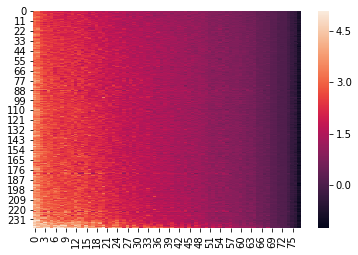

In [67]:
ndf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_wtd_amyloid_roi_data.csv')
ndf_wi.drop(ndf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_wi,copy=True)
sorter.loc[:,'mean'] = ndf_wi.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_wi,copy=True)
sorter2.loc['mean',:] = ndf_wi.mean(axis=0)
plt.close()
sns.heatmap(ndf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

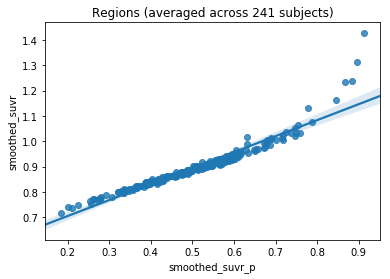

0.902874208062


In [305]:
plt.close()
sns.regplot(pdf[pdf.columns[:78]].mean(axis=1),ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_suvr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf[pdf.columns[:78]].mean(axis=1),ndf.mean(axis=1))[0]**2)

In [250]:
ndfs = {'suvr': ndf,'ica': ndf_ica, 'ica_2': ndf_ica2, 'weighted': ndf_wtd, 'ICA+weighted': ndf_wi, 
        'mixture_model -- VOXELWISE': mmdf, 'mixture_model -- REGIONWISE 2Comp': mm_ndf_simple, 
        'mixture_model -- REGIONWISE-complicated': mm_ndf, 'mixture_model -- REGIONWISE-BestComponent': mm_ndf_alt,
        'mixture_model -- REGIONWISE-BestComponent_Inverted': mm_ndf_alt_inv, 'MM_ICA2': mm_ndf_ica2_simple}

suvr = []
mm = []
for k,df in ndfs.items():
    df.loc[:,'amyloid'] = idf.amyloid_status.values
    df.loc[:,'DX'] = idf.DX.values
    print('for',k)
    thits = []
    fhits = []
    for i,col in enumerate(df.columns[:78]):
        t,p = stats.ttest_ind(df[df.amyloid==0][col],
                            df[df.amyloid==1][col])
        if p < 0.05:
            thits.append(i)
            if k == 'suvr':
                suvr.append([i,t])
            elif k == 'mixture_model':
                mm.append([i,t])
        f,p2 = stats.f_oneway(df[df.DX=='NL'][col],
                              df[df.DX=='MCI'][col],
                              df[df.DX=='Dementia'][col])
        if p2 < 0.05:
            fhits.append(i)
    print('%s regions were different by amyloid group'%len(thits))
    #print(thits)
    print('%s regions were different by disease group'%len(fhits))
    #print(fhits)

for suvr
47 regions were different by amyloid group
52 regions were different by disease group
for ica
6 regions were different by amyloid group
4 regions were different by disease group
for ica_2
8 regions were different by amyloid group
4 regions were different by disease group
for weighted
11 regions were different by amyloid group
0 regions were different by disease group
for ICA+weighted
11 regions were different by amyloid group
0 regions were different by disease group
for mixture_model -- VOXELWISE
51 regions were different by amyloid group
58 regions were different by disease group
for mixture_model -- REGIONWISE 2Comp
54 regions were different by amyloid group
52 regions were different by disease group
for mixture_model -- REGIONWISE-complicated
45 regions were different by amyloid group
41 regions were different by disease group
for mixture_model -- REGIONWISE-BestComponent
53 regions were different by amyloid group
48 regions were different by disease group
for mixture_mode

In [33]:
list(zip(suvr,mm))

[([1, -3.6197348294263061], [1, -3.9289997491541842]),
 ([3, -2.7494687372788817], [2, -2.036903679272716]),
 ([4, -4.0304555049318065], [3, -4.8187017390296871]),
 ([5, -2.6992123695130932], [4, -4.5499272748183746]),
 ([6, -4.1373462942594523], [5, -2.9146353960339235]),
 ([7, -3.2093748128016717], [6, -5.1071742326220733]),
 ([8, -2.4961806459376632], [7, -3.8610690214673089]),
 ([9, -2.2343212315142007], [8, -3.2753466187806577]),
 ([10, -2.4323368367394691], [9, -3.0305949980313072]),
 ([12, -4.3142819225723255], [10, -2.6997200047275181]),
 ([13, -4.0459810437969299], [11, -2.2443710158030474]),
 ([15, -2.7870116187806362], [12, -4.4196999432890269]),
 ([19, -3.0395373880954542], [13, -4.3177949312695105]),
 ([21, -2.1438744048500444], [15, -2.8868125316082556]),
 ([22, -3.8642560250758828], [19, -3.2206252029766187]),
 ([24, -3.3307768338407198], [20, -3.0680030945576511]),
 ([25, -3.156921213206942], [21, -2.3084949775317214]),
 ([26, -4.2972885238913863], [22, -4.0522501797855

In [8]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_SUVR_mixturemodel'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True, mx_model=2)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


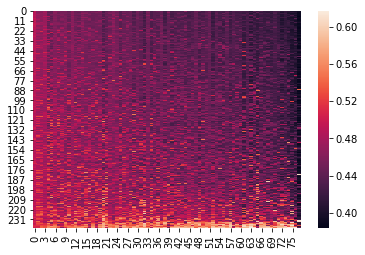

In [57]:
mmdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_SUVR_mixturemodel_roi_data.csv')
mmdf.drop(mmdf.columns[78:],axis=1,inplace=True)
msorter = pandas.DataFrame(mmdf,copy=True)
msorter.loc[:,'mean'] = mmdf.mean(axis=1)
msorter2 = pandas.DataFrame(mmdf,copy=True)
msorter2.loc['mean',:] = mmdf.mean(axis=0)
plt.close()
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [44]:
todrop = ['amyloid','DX']
ndf.drop(todrop,axis=1,inplace=True)
#mmdf.drop(todrop,axis=1,inplace=True)

ValueError: labels ['amyloid' 'DX'] not contained in axis

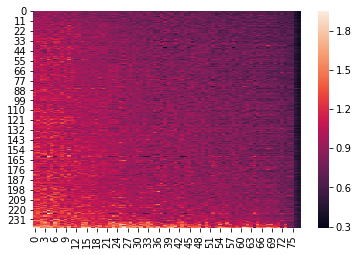

In [56]:
plt.close()
sorter = pandas.DataFrame(ndf,copy=True)
sorter.loc[:,'mean'] = ndf.mean(axis=1)
sorter2 = pandas.DataFrame(ndf,copy=True)
sorter2.loc['mean',:] = ndf.mean(axis=0)
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

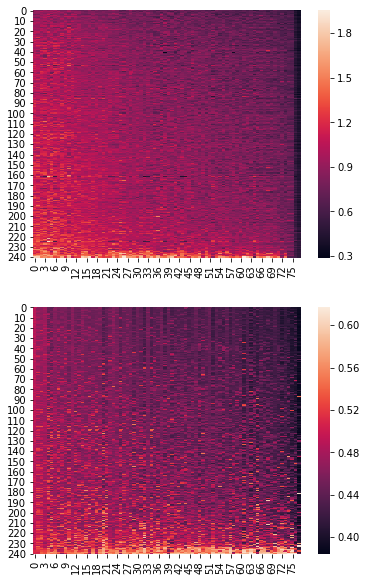

In [59]:
plt.close()
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,10))
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values,ax=ax1)
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values,ax=ax2)
plt.show()

In [61]:
mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns]

roi_1    roi_76    roi_77    roi_17    roi_56    roi_19    roi_31  \
210  0.488024  0.467094  0.464340  0.472225  0.449632  0.457091  0.461662   
236  0.491677  0.464738  0.462361  0.471961  0.445793  0.439398  0.462642   
9    0.491275  0.464161  0.462941  0.479427  0.441440  0.444852  0.465165   
17   0.489810  0.468064  0.468130  0.471250  0.449176  0.444777  0.463814   
37   0.487591  0.478189  0.467195  0.471841  0.442869  0.456067  0.457827   
189  0.492427  0.469698  0.466656  0.469522  0.442509  0.449634  0.457558   
174  0.487853  0.464033  0.461485  0.469483  0.474349  0.447253  0.465042   
122  0.488982  0.472412  0.464719  0.487937  0.485177  0.438709  0.460833   
94   0.487765  0.468715  0.470367  0.470132  0.447773  0.448220  0.462723   
5    0.496963  0.473914  0.467835  0.476639  0.460310  0.438568  0.458866   
92   0.491985  0.482211  0.465959  0.474464  0.450364  0.447286  0.463784   
87   0.490862  0.467447  0.461812  0.472545  0.484110  0.445473  0.460611   
114  0.496858  0.463353  0.462068  0.472161  0.439100  0.452851  0.456370   
81   0.489761  0.474333  0.478889  0.471101  0.450472  0.451641  0.462302   
65   0.496569  0.482675  0.472556  0.474197  0.445444  0.474223  0.462490   
15   0.498247  0.481639  0.473262  0.473971  0.447181  0.478325  0.462511   
29   0.486326  0.481852  0.473870  0.479638  0.452545  0.448461  0.461576   
20   0.494944  0.464129  0.462037  0.471935  0.439513  0.455483  0.456337   
191  0.494629  0.466478  0.463153  0.489101  0.452011  0.441600  0.458259   
206  0.488632  0.477250  0.468674  0.471384  0.445332  0.455116  0.464240   
119  0.490753  0.476330  0.468020  0.473911  0.446489  0.442874  0.458169   
27   0.485705  0.463333  0.463769  0.494979  0.482694  0.464922  0.460188   
139  0.486181  0.478904  0.465191  0.473843  0.448841  0.462856  0.465541   
146  0.487281  0.480165  0.510781  0.473194  0.444308  0.447770  0.457246   
33   0.486251  0.473558  0.465021  0.471529  0.449848  0.503216  0.457121   
156  0.493645  0.464256  0.461302  0.483717  0.498652  0.438528  0.471822   
235  0.485473  0.478283  0.494732  0.474266  0.450383  0.450467  0.455711   
64   0.484682  0.478054  0.469782  0.479308  0.443178  0.448211  0.462726   
155  0.490800  0.475203  0.470168  0.469902  0.448838  0.449067  0.465966   
230  0.496677  0.463687  0.463192  0.469335  0.464012  0.446077  0.471590   
..        ...       ...       ...       ...       ...       ...       ...   
232  0.489523  0.506358  0.485251  0.480959  0.453018  0.486789  0.465463   
131  0.483773  0.494905  0.483727  0.482992  0.484947  0.481189  0.473615   
14   0.493352  0.525061  0.519289  0.487468  0.525033  0.477168  0.480409   
50   0.494063  0.506168  0.477688  0.468763  0.521452  0.517069  0.499215   
234  0.497704  0.509748  0.499479  0.495286  0.476432  0.469090  0.507492   
154  0.490378  0.475628  0.473928  0.472481  0.505617  0.460477  0.467035   
58   0.484263  0.541482  0.541791  0.476418  0.520908  0.530047  0.491700   
238  0.496501  0.513559  0.488770  0.490837  0.534335  0.549214  0.491740   
60   0.499066  0.505247  0.511220  0.506298  0.496316  0.479114  0.493816   
233  0.490449  0.519552  0.518392  0.507256  0.497902  0.464216  0.512557   
187  0.491727  0.496231  0.497146  0.484323  0.499422  0.523598  0.495685   
86   0.492598  0.495577  0.490477  0.480046  0.498030  0.529653  0.544949   
229  0.482614  0.510451  0.533185  0.496704  0.463138  0.522338  0.507697   
23   0.499192  0.510815  0.517038  0.510329  0.499998  0.490963  0.504036   
161  0.483330  0.513758  0.535784  0.491927  0.467369  0.528825  0.508756   
148  0.501790  0.536788  0.543213  0.485951  0.535910  0.465364  0.541773   
167  0.494528  0.530319  0.524885  0.502321  0.529679  0.530139  0.519630   
130  0.498196  0.503730  0.485025  0.493764  0.485938  0.541119  0.483359   
185  0.509313  0.504674  0.490984  0.483039  0.500760  0.494336  0.476646   
151  0.492848  0.526590  0.525850  0.473751  0.483091  0.453279  0.502673   
169 

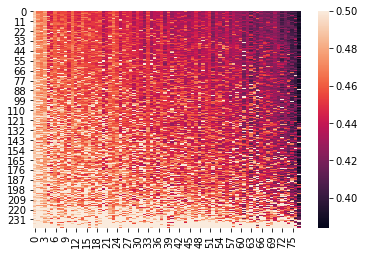

In [66]:
plt.close()
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values,
           vmax=0.5)
plt.show()

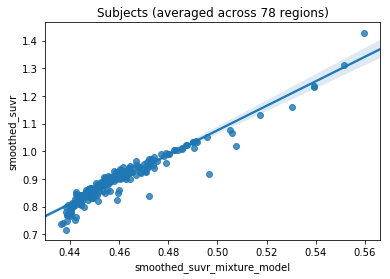

0.917669359624


In [76]:
plt.close()
sns.regplot(mmdf.mean(axis=1),ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model')
plt.ylabel('smoothed_suvr')
plt.title('Subjects (averaged across 78 regions)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),ndf.mean(axis=1))[0]**2)

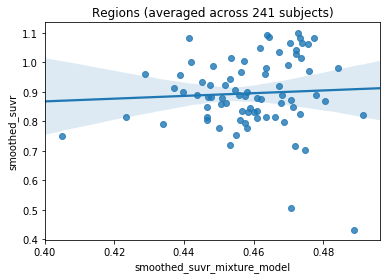

0.00313617042958


In [77]:
plt.close()
sns.regplot(mmdf.mean(axis=0),ndf.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model')
plt.ylabel('smoothed_suvr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),ndf.mean(axis=0))[0]**2)

In [4]:
def prepare_PET_data(files_in, atlas, ref = None, msk = None, dimension_reduction = False,
                     ECDF_in = None, output_type = 'py', out_dir = './', out_name = 'PET_data', 
                     save_matrix = False, save_ECDF = False, save_images = False, ref_index = [],
                    mx_model = 0, orig_atlas = None):
    ''' This is a function that will take several PET images and an atlas and will
    return a subject X region matrix. If specified, the function will also calculate 
    probabilities (via ECDF) either voxelwise, or using a specified reference region
    
    files_in = input can either be 
        - a path to a directory full of (only) nifti images OR
        - a "search string" using wildcards
        - a list of subject paths OR
        - a subject X image matrix
        
    altas = a path to a labeled regional atlas in the same space as the PET data
    
    ref = multiple options:
        - If None, no probabilities will be calculated, and script will simply extract
        regional PET data using the atlas.
        - If a path to a reference region mask, will calculate voxelwise probabilities
        based on values within the reference region. Mask must be in the same space as 
        as PET data and atlas
        - If a list of integers, will combine these atlas labels with these integers to 
        make reference region 
        - if 'voxelwise', voxelwise (or atom-wise from dimension reduction) probabilities
        will be estimated. In other words, each voxel or atom will use serve as its own
        reference.
        
    msk = A path to a binary mask file in the same space as PET data and atlas. If None,
        mask will be computed as a binary mask of the atlas.
        ** PLEASE NOTE: The mask will be used to mask the reference region! **
    
    dimension_reduction = whether or not to first reduce dimensions of data using
    hierarchical clustering. This results in an initial step that will be very slow, but 
    will may result in an overall speedup for the script, but perhaps only if ref is set 
    to 'voxelwise'.
        - If None, do not perform dimension reduction
        - If integer, the number of atoms (clusters) to reduce to
    
    ECDF_in = If the user wishes to apply an existing ECDF to the PET data instead of
        generating one de novo, that can be done here. This crucial if the user wishes to
        use multiple datasets. Think of it like scaling in machine learning.
        - If None, will generate ECDF de novo.
        - If np.array, will use this array to generate the ECDF.
        - If statsmodel ECDF object, will use this as ECDF
        - If a path, will use the
    
    output_type = type of file to save final subject x region matrix into. multiple options:
        -- 'py' will save matrix into a csv
        -- 'mat' will save matrix into a matfile
    
    out_dir = location to save output files. Defaults to current directory
    
    out_name = the prefix for all output files
    
    save_matrix = Whether to save or return subject x image matrix. Useful if running multiple 
        times, as this matrix can be set as files_in, bypassing the costly data import
        -- if 'return', will return subject x image matrix to python environment
        -- if 'save', will write subject x image matrix to file. 
        -- if None, matrix will not be stored
    
    save_ECDF = whether to save the ECDF used to create the probabilities. This is crucial if 
        using multiple datasets. The resulting output can be used as input for the ECDF argument.
        -- if 'return, will return np.array to python environment
        -- if 'save', will write array to file
        -- if None, array will not be stored
    
    '''
    # Check input arguments
    print('initiating...')
    if output_type != 'py' and output_type != 'mat':
        raise IOError('output_type must be set to py or mat')
    
    
    # Initialize variables
    
    # Load data
    print('loading data...')
    i4d = load_data(files_in) # load PET data
    if save_matrix == 'save':
        otpt = os.path.join(out_dir,'%s_4d_data'%out_name)
        print('saving 4d subject x scan to nifti image: \n',otpt)
        i4d.to_filename(otpt)
    
    # load atlas
    atlas = ni.load(atlas).get_data().astype(int)
    if orig_atlas == True:
        orig_atlas = np.array(atlas, copy=True)
    if atlas.shape != i4d.shape[:3]:
        raise ValueError('atlas dimensions do not match PET data dimensions')
    
    # load reference region
    if type(ref) == str and ref != 'voxelwise': 
        print('looking for reference image...')
        if not os.path.isdir(ref):
            raise IOError('Please enter a valid path for ref, or select a different option for this argument')
        else:
            ref_msk = ni.load(ref).get_data()
            if ref_msk.shape != i4d.shape[:3]:
                raise ValueError('ref region image dimensions do not match PET data dimensions')
    elif type(ref) == list:
        ref_msk = np.zeros_like(atlas)
        for i in ref:
            ref_msk[atlas == i] = 1
    else:
        ref_msk = None
    
    
    # Mask data
    print('masking data...')
    if msk == None:
        img_mask = np.array(atlas,copy=True)
        img_mask[img_mask<1] = 0
        img_mask[img_mask>0] = 1
    else:
        img_mask = ni.load(msk).get_data()
        atlas[img_mask < 1] = 0
    
    if type(ref_msk) != type(None):
        ref_msk[img_mask < 1] = 0
    
    mask_tfm = input_data.NiftiMasker(ni.Nifti1Image(img_mask,i4d.affine))
    mi4d = mask_tfm.fit_transform(i4d)
    
    # dimension reduction (IN BETA!)
    if dimension_reduction:
        print('reducing dimensions...')
        shape = img_mask.shape
        connectivity = grid_to_graph(n_x=shape[0], n_y=shape[1],
                                   n_z=shape[2], mask=img_mask)
    # main ECDF calculation (or mixture model calc)
    skip = False
    if ref != 'voxelwise':
        if type(ECDF_in) != type(None): 
            print('generating ECDF...')
            print('using user-supplied data...')
            if type(ECDF_in) == ed.ECDF:
                mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                input_distribution = 'not generated'
            elif type(ECDF_in) == np.ndarray:
                mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                input_distribution = ECDF_in
    #       elif # add later an option for importing an external object 
            else:
                try:
                    mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                    print('Could not understand ECDF input, but ECDF successful')
                    input_distribution = 'not generated'
                except:
                    raise IOError(
                            'Invalid argument for ECDF in. Please enter an ndarray, an ECDF object, or a valid path')
        else:
            if type(ref_msk) != type(None):
                print('generating ECDF...')
                ref_tfm = input_data.NiftiMasker(ni.Nifti1Image(ref_msk,i4d.affine))
                refz = ref_tfm.fit_transform(i4d)
                mi4d_ecdf, ecref = ecdf_simple(mi4d, refz, mx=mx_model)
                input_distribution = refz.flat
            else:
                print('skipping ECDF...')
                skip = True
    
    else:
        print('generating voxelwise ECDF...')
        mi4d_ecdf, ECDF_array = ecdf_voxelwise(mi4d, ref_index, save_ECDF, mx=mx_model)
        input_distribution = 'not generated'
        
    if not skip:
#       if save_ECDF:
#           create an array and somehow write it to a file
        
    # transform back to image-space
        print('transforming back into image space')
        f_images = mask_tfm.inverse_transform(mi4d_ecdf)
    
    else:
        #if type(ECDF):
        print('transforming back into image space')
        f_images = mask_tfm.inverse_transform(mi4d)
    
    # generate output matrix
    print('generating final subject x region matrix')
    if type(orig_atlas) == type(None):
        f_mat = generate_matrix_from_atlas(f_images, atlas)
    else:
        f_mat = generate_matrix_from_atlas(f_images, orig_atlas)
    
    # compile (and save) outputs
    print('preparing outputs')
    output = {}
    if output_type == 'py':
        f_mat.to_csv(os.path.join(out_dir, '%s_roi_data.csv'%out_name),index=False)
        output.update({'roi_matrix': f_mat})
    else:
        output.update({'roi_matrix': fmat.values})
        output.update({'roi_matrix_columns': fmat.columns})
    if save_matrix == 'return':
        output.update({'4d_image_matrix': i4d})
    if save_ECDF == 'return':
        if output_type == 'py':
            output.update({'ECDF_function': ECDF_array})
        else:
            output.update({'input_distribution': input_distribution})
    
def load_data(files_in):
    
    fail = False
    
    if type(files_in) == str:
        if os.path.isdir(files_in):
            print('It seems you passed a directory')
            search = os.path.join(files_in,'*')
            num_f = len(glob(search))
            if num_f == 0:
                raise IOError('specified directory did not contain any files')
            else:
                print('found %s images!'%num_f)
            i4d = image.load_img(search)
        elif '*' in files_in:
            print('It seems you passed a search string')
            num_f = len(glob(files_in))
            if num_f == 0:
                raise IOError('specified search string did not result in any files')
            else:
                print('found %s images'%num_f)
            i4d = image.load_img(files_in)
        else:
            fail = True
    elif type(files_in) == list:
        print('processing %s subjects'%len(files_in))
        i4d = ni.concat_images(files_in)
    elif type(files_in) == ni.nifti1.Nifti1Image:
        print('processing %s subjects'%files_in.shape[-1])
        i4d = files_in
    else:
        fail = True
        
    if fail:
        print('files_in not recognized.', 
                    'Please enter a search string, valid directory, list of subjects, or matrix')
        raise ValueError('I do not recognize the files_in input.')
    
    return i4d

def dim_reduction(mi4d, connectivity, dimension_reduction):
    ward = FeatureAgglomeration(n_clusters=dimension_reduction/2,
            connectivity=connectivity, linkage='ward', memory='nilearn_cache')
    ward.fit(mi4d)
    ward = FeatureAgglomeration(n_clusters=dimension_reduction,
            connectivity=connectivity, linkage='ward', memory='nilearn_cache')
    ward.fit(mi4d)                                                         
    mi4d = ward.transform(mi4d)

    return mi4d

def ecdf_simple(mi4d, refz, mx=0):

    if type(refz) == ed.ECDF:
        ecref = refz
    else:
        if len(refz.shape) > 1:
            ecref = ed.ECDF(refz.flat)
        else:
            ecref = ed.ECDF(refz)
    print('transforming images...')
    if mx == 0:
        mi4d_ecdf = ecref(mi4d.flat).reshape(mi4d.shape[0],mi4d.shape[1])
    else:
        print('are you sure it makes sense to use a mixture model on reference region?')
        mod = GaussianMixture(n_components=mx).fit(ecref)
        mi4d_ecdf = mod.predict_proba(mi4d.flat)[:,-1].reshape(mi4d.shape[0],mi4d.shape[1])

    return mi4d_ecdf, ecref   

def ecdf_voxelwise(mi4d, ref_index, save_ECDF, mx=0):
    
    X,y = mi4d.shape
    if mx != 0: 
        mmod = GaussianMixture(n_components=mx)
    
    if len(ref_index) == 0:
        if not save_ECDF:
            if mx == 0:
                mi4d_ecdf = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).transpose()
            else:
                mi4d_ecdf = np.array([mmod.fit(mi4d[:,x].reshape(-1,1)).predict_proba(mi4d[:,x].reshape(-1,1)
                                                                                    )[:,-1] for x in range(y)]).transpose()
            ECDF_array = None    
        else:
            if mx == 0:
                ECDF_array = np.array([ed.ECDF(mi4d[:,x]) for x in range(y)]).transpose()
                print('transforming data...')
                mi4d_ecdf = np.array([ECDF_matrix[x](mi4d[:,x]) for x in range(y)]
                                         ).transpose()
            else:
                raise IOError('at this stage, cant save mixture model info....sorry...')
    else:
        if mx == 0:
            # if you don't want to include subjects used for reference, un-hash this, hash
            # the next line, and fix the "transpose" line so that the data gets back into the matrix properly
            #good_ind = [x for x in list(range(X)) if x not in ref_index]
            good_ind = range(X)
            if not save_ECDF:    
                mi4d_ecdf = np.array([ed.ECDF(mi4d[ref_index,x])(mi4d[good_ind,x]) for x in range(y)]
                                    ).transpose()
                ECDF_array = None
            else:
                ECDF_array = [ed.ECDF(mi4d[ref_index,x]) for x in range(y)]
                print('transforming data...')
                mi4d_ecdf = ecdf_voxelwise = np.array([ECDF_matrix[x](mi4d[good_ind,x]) for x in range(y)]
                                         ).transpose()
        else:
            ### COMING SOON!
            raise IOError('have not yet set up implementation for mixture models and reg groups')
        
    return mi4d_ecdf, ECDF_array

def generate_matrix_from_atlas(files_in, atlas):
    
    files_in = files_in.get_data()
    atlas = atlas.astype(int)
    f_mat = pandas.DataFrame(index = range(files_in.shape[-1]),
                             columns = ['roi_%s'%x for x in np.unique(atlas) if x != 0])
    tot = np.bincount(atlas.flat)
    for sub in range(files_in.shape[-1]):
        mtx = files_in[:,:,:,sub]
        sums = np.bincount(atlas.flat, weights = mtx.flat)
        rois = (sums/tot)[1:]
        f_mat.loc[f_mat.index[sub]] = rois
        
    return f_mat



In [5]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*002*'))
i4d = load_data(scans)

processing 6 subjects


In [363]:
#trial = s_scans[:4] + s_scans[-20:-16]
#files_in = trial
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
out_dir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_ica_regr'
msk = None 
dimension_reduction = False
ECDF_in = None 
output_type = 'py'
save_matrix = False
save_ECDF = False
save_images = False
ref_index = []


# Check input arguments
print('initiating...')
if output_type != 'py' and output_type != 'mat':
    raise IOError('output_type must be set to py or mat')


# Initialize variables

# Load data
print('loading data...')
i4d = load_data(files_in) # load PET data
if save_matrix == 'save':
    otpt = os.path.join(out_dir,'%s_4d_data'%out_name)
    print('saving 4d subject x scan to nifti image: \n',otpt)
    i4d.to_filename(otpt)

# load atlas
atlas = ni.load(atlas).get_data().astype(int) 
if atlas.shape != i4d.shape[:3]:
    raise ValueError('atlas dimensions do not match PET data dimensions')

# load reference region
if type(ref) == str and ref != 'voxelwise': 
    print('looking for reference image...')
    if not os.path.isdir(ref):
        raise IOError('Please enter a valid path for ref, or select a different option for this argument')
    else:
        ref_msk = ni.load(ref).get_data()
        if ref_msk.shape != i4d.shape[:3]:
            raise ValueError('ref region image dimensions do not match PET data dimensions')
elif type(ref) == list:
    ref_msk = np.zeros_like(atlas)
    for i in ref:
        ref_msk[atlas == i] = 1
else:
    ref_msk = None


# Mask data
print('masking data...')
if msk == None:
    img_mask = np.array(atlas,copy=True)
    img_mask[img_mask<1] = 0
    img_mask[img_mask>0] = 1
else:
    img_mask = ni.load(msk).get_data()
    atlas[img_mask < 1] = 0

if type(ref_msk) != type(None):
    ref_msk[img_mask < 1] = 0

mask_tfm = input_data.NiftiMasker(ni.Nifti1Image(img_mask,i4d.affine))
mi4d = mask_tfm.fit_transform(i4d)

# dimension reduction (IN BETA!)
if dimension_reduction:
    print('reducing dimensions...')
    shape = img_mask.shape
    connectivity = grid_to_graph(n_x=shape[0], n_y=shape[1],
                               n_z=shape[2], mask=img_mask)

initiating...
loading data...
processing 241 subjects
masking data...


In [259]:
ECDF_in = None
X,y = mi4d.shape

if len(ref_index) == 0:
    if not save_ECDF:
        mi4d_ecdf = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).reshape(X,y)
        ECDF_array = None
    else:
        ECDF_array = np.array([ed.ECDF(mi4d[:,x]) for x in range(y)]).reshape(X,y)
        print('transforming data...')
        mi4d_ecdf = np.array([ECDF_matrix[x](mi4d[:,x]) for x in range(y)]
                                 ).reshape(X,y)
else:
    # if you don't want to include subjects used for reference, un-hash this, hash
    # the next line, and fix the "transpose" line so that the data gets back into the matrix properly
    #good_ind = [x for x in list(range(X)) if x not in ref_index]
    good_ind = range(X)
    if not save_ECDF:    
        mi4d_ecdf = np.array([ed.ECDF(mi4d[ref_index,x])(mi4d[good_ind,x]) for x in range(y)]
                            ).reshape(X,y)
        ECDF_array = None
    else:
        ECDF_array = [ed.ECDF(mi4d[ref_index,x]) for x in range(y)]
        print('transforming data...')
        mi4d_ecdf = ecdf_voxelwise = np.array([ECDF_matrix[x](mi4d[good_ind,x]) for x in range(y)]
                                 ).reshape(X,y)

In [260]:
inter = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)])

In [ ]:
me_trans = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).transpose()

In [270]:
print(inter.shape)
print(mi4d.shape)
print(mi4d_ecdf.shape)
print(me_trans.shape)

(354736, 8)
(8, 354736)
(8, 354736)
(8, 354736)


In [273]:
mi4d[:,90000]

array([ 1.00283515,  0.77797401,  1.02097845,  0.7926057 ,  1.41267788,
        0.61282933,  0.75810754,  1.20101714])

In [274]:
inter[90000,:]

array([ 0.625,  0.375,  0.75 ,  0.5  ,  1.   ,  0.125,  0.25 ,  0.875])

In [275]:
mi4d_ecdf[:,90000]

array([ 0.875,  0.625,  0.125,  0.5  ,  0.75 ,  0.125,  0.875,  0.375])

In [276]:
me_trans[:,90000]

array([ 0.625,  0.375,  0.75 ,  0.5  ,  1.   ,  0.125,  0.25 ,  0.875])

In [278]:
f_images1 = mask_tfm.inverse_transform(mi4d_ecdf)
f_images2 = mask_tfm.inverse_transform(me_trans)
f_images_n = mask_tfm.inverse_transform(mi4d)

In [284]:
f_images_n.get_data()[53,49,69,:]

array([ 0.85074848,  1.15935278,  0.93857628,  1.11822689,  1.31499374,
        1.35014725,  0.85478866,  1.68751264])

In [285]:
f_images1.get_data()[53,49,69,:]

array([ 0.375,  0.375,  0.5  ,  0.125,  0.625,  0.375,  0.75 ,  0.75 ])

In [286]:
f_images2.get_data()[53,49,69,:]

array([ 0.125,  0.625,  0.375,  0.5  ,  0.75 ,  0.875,  0.25 ,  1.   ])

In [287]:
f_mat1 = generate_matrix_from_atlas(f_images1, atlas)
f_mat2 = generate_matrix_from_atlas(f_images2, atlas)
f_mat_n = generate_matrix_from_atlas(f_images_n, atlas)

In [293]:
f_mat1['roi_62']

0    0.561274
1    0.570502
2    0.573975
3    0.575457
4    0.568098
5    0.571207
6    0.564479
7    0.561322
Name: roi_62, dtype: object

In [294]:
f_mat2['roi_62']

0    0.330994
1    0.380027
2    0.466267
3    0.500073
4    0.512969
5     0.83811
6     0.52414
7    0.947421
Name: roi_62, dtype: object

In [295]:
f_mat_n['roi_62']

0    0.914806
1    0.994379
2     1.08081
3     1.09408
4     1.12761
5     1.38841
6     1.11542
7     1.56116
Name: roi_62, dtype: object

In [9]:
jnk = np.random.randn(100)

In [13]:
ejnk = ECDF(abs(jnk))

In [16]:
ejnk([3, 2, 1.5, 2.3])

array([ 1.  ,  0.97,  0.87,  0.99])

In [20]:
ejnk = ECDF([1,1.2,1,1.2,1,1.2,1.5,1,1.2,1,1.2,1.5,1,1.2,1.8,2,3])


In [30]:
jnk([1,1.2,1.5,1.8,2,3])

array([ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.66666667,
        0.83333333])

In [32]:
jnk = np.random.randn(91)

In [33]:
%%timeit
r = ECDF(jnk)

The slowest run took 7.58 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 78.9 µs per loop


In [35]:
r = ECDF(jnk)

In [36]:
%%timeit
r(jnk)

The slowest run took 10.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.22 µs per loop


In [37]:
78.9 + 7.22

86.12

In [40]:
(86.12 * 1000000) / 1000000

86.12

In [39]:
602/60

10.033333333333333

In [79]:
ECDF(jnk)(jnk)

array([ 0.46153846,  0.85714286,  0.86813187,  0.53846154,  0.61538462,
        0.89010989,  0.37362637,  0.69230769,  0.35164835,  0.24175824,
        0.32967033,  0.95604396,  0.16483516,  0.1978022 ,  0.93406593,
        0.92307692,  0.08791209,  0.05494505,  0.57142857,  0.91208791,
        0.41758242,  0.6043956 ,  0.43956044,  0.83516484,  0.0989011 ,
        0.48351648,  0.45054945,  0.03296703,  0.30769231,  0.9010989 ,
        0.12087912,  0.47252747,  0.42857143,  0.59340659,  0.98901099,
        0.3956044 ,  0.54945055,  0.49450549,  0.67032967,  0.73626374,
        0.01098901,  0.56043956,  0.8021978 ,  0.38461538,  0.96703297,
        1.        ,  0.04395604,  0.81318681,  0.17582418,  0.28571429,
        0.7032967 ,  0.10989011,  0.15384615,  0.18681319,  0.20879121,
        0.02197802,  0.25274725,  0.34065934,  0.87912088,  0.97802198,
        0.07692308,  0.27472527,  0.2967033 ,  0.79120879,  0.58241758,
        0.50549451,  0.74725275,  0.71428571,  0.13186813,  0.76

In [365]:
mi4d.shape

(241, 354736)

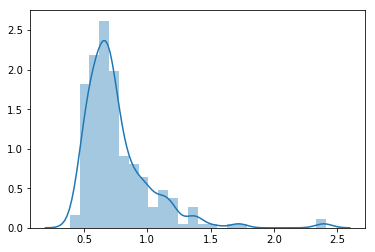

In [371]:
plt.close()
sns.distplot(mi4d[:,90000])
plt.show()

In [386]:
sns.distplot?

In [382]:
mmod = GaussianMixture(n_components=2)

In [383]:
mmod_a = mmod.fit(mi4d[:,90000].reshape(-1,1))

In [387]:
labs = mmod_a.predict(mi4d[:,90000].reshape(-1,1))

In [390]:
lprob1 = mmod_a.predict_proba(mi4d[:,90000].reshape(-1,1))[:,0]
lprob2 = mmod_a.predict_proba(mi4d[:,90000].reshape(-1,1))[:,1]

In [9]:
plt.close()
sns.kdeplot([mi4d[:,90000][x] for x in range(len(mi4d[:,90000])) if labs[x] == 0])
sns.kdeplot([mi4d[:,90000][x] for x in range(len(mi4d[:,90000])) if labs[x] == 1])
sns.distplot(mi4d[:,90000])
plt.show()

NameError: name 'mi4d' is not defined

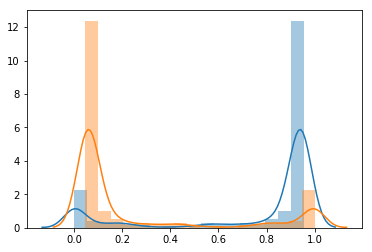

In [392]:
plt.close()
sns.distplot(lprob1)
sns.distplot(lprob2)
plt.show()

In [402]:
mmod_a.bic(mi4d[:,90000].reshape(-1,1))

-43.066199328903515

In [403]:
GaussianMixture(n_components=1).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

71.680268648784477

In [404]:
GaussianMixture(n_components=3).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

-51.868908468082481

In [405]:
GaussianMixture(n_components=4).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

-48.306629697237973

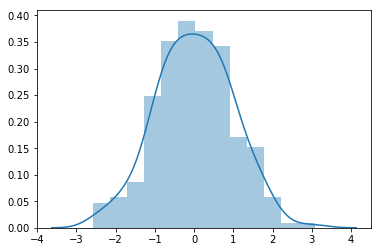

In [85]:
normrand = np.random.normal(size=241)
plt.close()
sns.distplot(normrand)
plt.show()

In [88]:
GaussianMixture(n_components=1).fit(normrand.reshape(-1,1)).bic(normrand.reshape(-1,1))

685.52323050737778

In [90]:
GaussianMixture(n_components=2).fit(normrand.reshape(-1,1)).bic(normrand.reshape(-1,1))

702.9684968460989

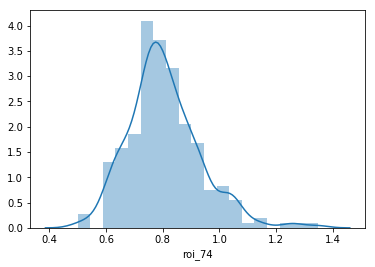

In [138]:
plt.close()
sns.distplot(ndf['roi_74'])
plt.show()

In [142]:
ndf['roi_74'].values[labs==0].mean() > ndf['roi_74'].values[labs==1].mean() 

True

In [146]:
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        print(col,'one component solution')
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        numb = len([x for x in labs if x == 1])/len(ndf[col])
        print(col,'number of 2nd component subs:',numb)
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            print('WRONG WAY!!!')

roi_1 one component solution
roi_2 number of 2nd component subs: 0.04149377593360996
roi_3 number of 2nd component subs: 0.22821576763485477
roi_4 one component solution
roi_5 number of 2nd component subs: 0.058091286307053944
roi_6 number of 2nd component subs: 0.024896265560165973
roi_7 number of 2nd component subs: 0.08298755186721991
roi_8 number of 2nd component subs: 0.3070539419087137
roi_9 number of 2nd component subs: 0.024896265560165973
roi_10 number of 2nd component subs: 0.979253112033195
WRONG WAY!!!
roi_11 number of 2nd component subs: 0.9128630705394191
WRONG WAY!!!
roi_12 number of 2nd component subs: 0.12448132780082988
roi_13 number of 2nd component subs: 0.12033195020746888
roi_14 number of 2nd component subs: 0.11203319502074689
roi_15 one component solution
roi_16 number of 2nd component subs: 0.029045643153526972
roi_17 one component solution
roi_18 number of 2nd component subs: 0.029045643153526972
roi_19 one component solution
roi_20 number of 2nd component sub

In [148]:
mm_ndf = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            mm_ndf.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
        else:
            mm_ndf.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                    ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [149]:
mm_ndf_simple = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    mm_ndf_simple.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [150]:
mm_ndf_alt = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_alt.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        mm_ndf_alt.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                    ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [151]:
mm_ndf_alt_inv = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_alt_inv.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        probs = GMM2.fit(ndf[col].values.reshape(-1,1)
                        ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            mm_ndf_alt_inv.loc[:,col] = 1 - probs
        else:
            mm_ndf_alt_inv.loc[:,col] = probs

In [112]:
jnk = GMM1.fit(ndf[ndf.columns[0]].values.reshape(-1,1))

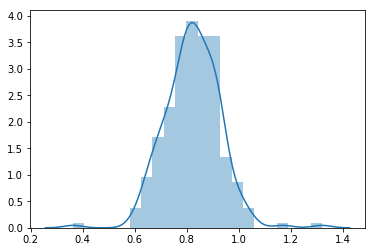

In [111]:
plt.close()
sns.distplot(ndf[ndf.columns[0]].values.reshape(-1,1))
plt.show()

In [122]:
len(jnk.score_samples(ndf[ndf.columns[0]].values.reshape(-1,1)))

241

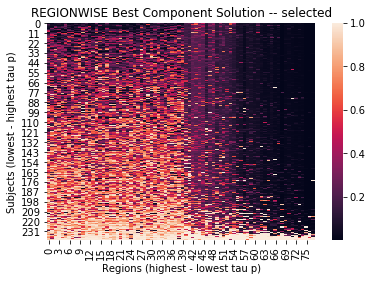

In [183]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf,copy=True)
sorter.loc[:,'mean'] = mm_ndf.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf,copy=True)
sorter2.loc['mean',:] = mm_ndf.mean(axis=0)
sns.heatmap(mm_ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution -- selected')
plt.show()

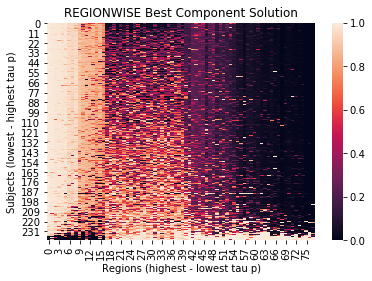

In [184]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_alt,copy=True)
sorter.loc[:,'mean'] = mm_ndf_alt.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_alt,copy=True)
sorter2.loc['mean',:] = mm_ndf_alt.mean(axis=0)
sns.heatmap(mm_ndf_alt.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution')
plt.show()

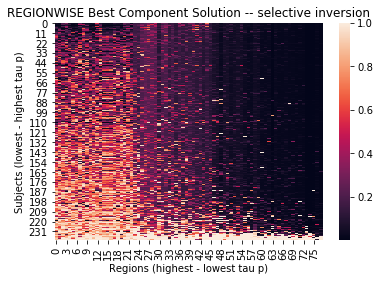

In [206]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_alt_inv,copy=True)
sorter.loc[:,'mean'] = mm_ndf_alt_inv.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_alt_inv,copy=True)
sorter2.loc['mean',:] = mm_ndf_alt_inv.mean(axis=0)
sns.heatmap(mm_ndf_alt_inv.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution -- selective inversion')
plt.show()

In [19]:
ldf = pandas.read_csv('/home/users/jvogel/git/pycourse/stuff/dst_labels.csv',header=None)
ldf.columns = ['label','ROI']
ldf.head()

label                         ROI
0      1   Caudal anterior cingulate
1      2       Caudal middle frontal
2      3                      Cuneus
3      4                   entorinal
4      5                    fusiform

In [222]:
for col in mm_ndf_alt_inv.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mm_ndf_alt_inv[col].mean())

roi_37 [' Globus Pallidus'] 0.502074688797
roi_78 [' Thalamus'] 0.502074688797
roi_42 [' Cuneus'] 0.502074688797
roi_19 [' Pericalcarine'] 0.502074688797
roi_32 [' Basal forebrain'] 0.502074688797
roi_75 [' Hippocampus'] 0.502074688797
roi_72 [' Amygdala'] 0.502074688797
roi_58 [' Pericalcarine'] 0.502074688797
roi_56 [' Pars orbitalis'] 0.502074688797
roi_43 [' entorinal'] 0.502074688797
roi_31 [' Insula'] 0.502074688797
roi_36 [' Hippocampus'] 0.502074688797
roi_15 [' Paracentral '] 0.502074688797
roi_17 [' Pars orbitalis'] 0.502074688797
roi_77 [' Putamen'] 0.502074688797
roi_38 [' Putamen'] 0.502074688797
roi_76 [' Globus Pallidus'] 0.502074688797
roi_35 [' Caudate'] 0.502074688797
roi_33 [' Amygdala'] 0.502074688797
roi_39 [' Thalamus'] 0.502074688797
roi_1 [' Caudal anterior cingulate'] 0.502074688797
roi_4 [' entorinal'] 0.502074688797
roi_71 [' Basal forebrain'] 0.502074688797
roi_34 [' Hypothalamus???'] 0.397298919605
roi_8 [' Isthmus cingulate'] 0.396278069927
roi_63 [' Rostr

In [ ]:
mm_ndf_simple.drop(['amyloid','DX'])

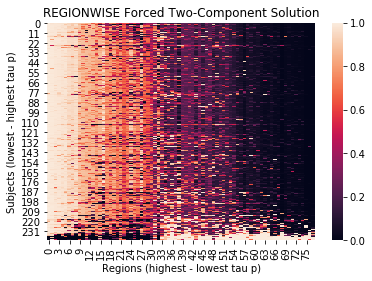

In [276]:
#mm_ndf_simple.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_simple,copy=True)
sorter.loc[:,'mean'] = mm_ndf_simple.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_simple,copy=True)
sorter2.loc['mean',:] = mm_ndf_simple.mean(axis=0)
sns.heatmap(mm_ndf_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Forced Two-Component Solution')
plt.show()

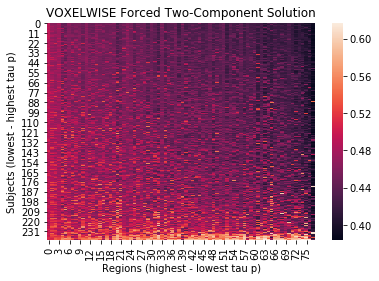

In [224]:
#mmdf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mmdf,copy=True)
sorter.loc[:,'mean'] = mmdf.mean(axis=1)
sorter2 = pandas.DataFrame(mmdf,copy=True)
sorter2.loc['mean',:] = mmdf.mean(axis=0)
sns.heatmap(mmdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('VOXELWISE Forced Two-Component Solution')
plt.show()

In [227]:
for col in mmdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mmdf[col].mean())

roi_1 [' Caudal anterior cingulate'] 0.491425068252
roi_76 [' Globus Pallidus'] 0.488721809529
roi_77 [' Putamen'] 0.484184952857
roi_17 [' Pars orbitalis'] 0.480557597157
roi_56 [' Pars orbitalis'] 0.477815706375
roi_19 [' Pericalcarine'] 0.477336054845
roi_31 [' Insula'] 0.47596405678
roi_58 [' Pericalcarine'] 0.47570725779
roi_39 [' Thalamus'] 0.474677917458
roi_43 [' entorinal'] 0.474005249046
roi_38 [' Putamen'] 0.4736499969
roi_10 [' Lateral orbitofronal'] 0.473196161899
roi_4 [' entorinal'] 0.473176313847
roi_42 [' Cuneus'] 0.472731880409
roi_30 [' Transverse temporal'] 0.472175700646
roi_32 [' Basal forebrain'] 0.472168241621
roi_78 [' Thalamus'] 0.471831242545
roi_12 [' Medial orbitofrontal'] 0.471206951695
roi_37 [' Globus Pallidus'] 0.470721267833
roi_24 [' Rostral anterior cingulate'] 0.470580232925
roi_72 [' Amygdala'] 0.470325064976
roi_71 [' Basal forebrain'] 0.469851392349
roi_20 [' Postcentral'] 0.468580550416
roi_40 [' Caudal anterior cingulate'] 0.468127711391
roi_49

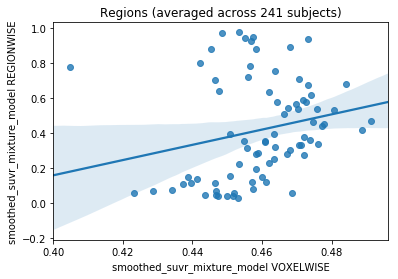

0.0502669942499


In [158]:
plt.close()
sns.regplot(mmdf.mean(axis=0),mm_ndf_simple.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),mm_ndf_simple.mean(axis=0))[0]**2)

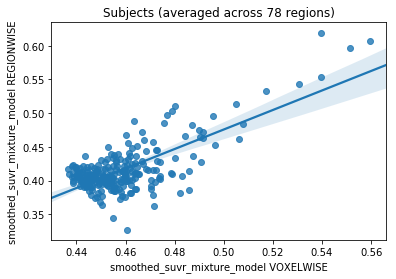

0.542945903999


In [159]:
plt.close()
sns.regplot(mmdf.mean(axis=1),mm_ndf_simple.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Subjects (averaged across 78 regions)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),mm_ndf_simple.mean(axis=1))[0]**2)

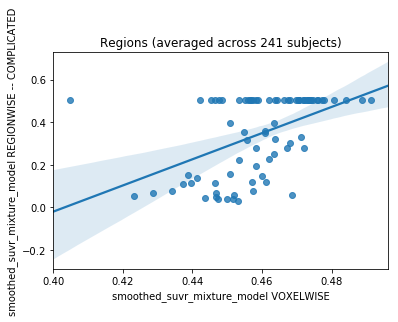

0.245648098491


In [160]:
plt.close()
sns.regplot(mmdf.mean(axis=0),mm_ndf.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),mm_ndf.mean(axis=0))[0]**2)

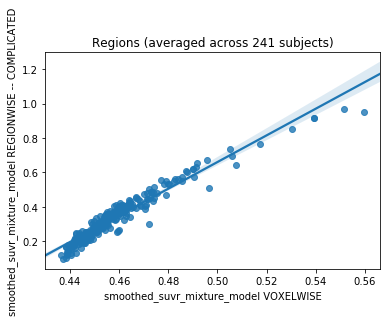

0.931735234364


In [161]:
plt.close()
sns.regplot(mmdf.mean(axis=1),mm_ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),mm_ndf.mean(axis=1))[0]**2)

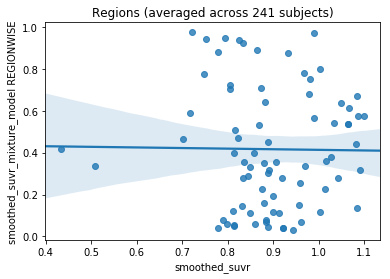

0.000150720313983


In [163]:
plt.close()
sns.regplot(ndf.mean(axis=0),mm_ndf_simple.mean(axis=0))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=0),mm_ndf_simple.mean(axis=0))[0]**2)

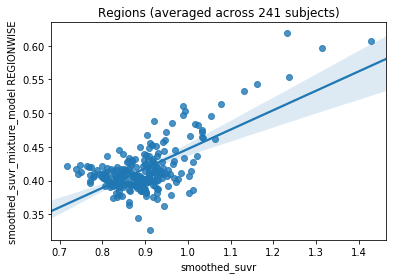

0.457251419893


In [162]:
plt.close()
sns.regplot(ndf.mean(axis=1),mm_ndf_simple.mean(axis=1))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=1),mm_ndf_simple.mean(axis=1))[0]**2)

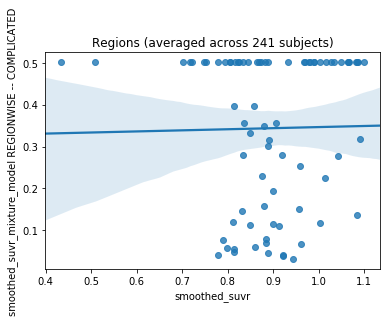

0.000299893428588


In [164]:
plt.close()
sns.regplot(ndf.mean(axis=0),mm_ndf.mean(axis=0))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=0),mm_ndf.mean(axis=0))[0]**2)

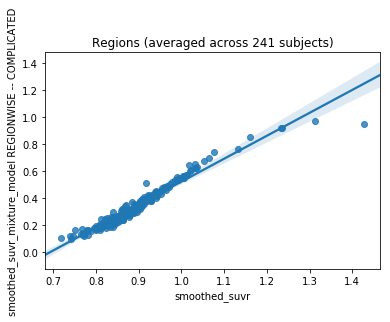

0.949141068305


In [165]:
plt.close()
sns.regplot(ndf.mean(axis=1),mm_ndf.mean(axis=1))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=1),mm_ndf.mean(axis=1))[0]**2)

In [152]:
mm_ndf_ica2_simple = pandas.DataFrame(index = ndf_ica2.index, columns = ndf_ica2.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf_ica2:
    bic1 = GMM1.fit(ndf_ica2[col].values.reshape(-1,1)).bic(ndf_ica2[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)).bic(ndf_ica2[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_ica2_simple.loc[:,col] = ed.ECDF(ndf_ica2[col].values)(ndf_ica2[col])
    else:
        labs = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)).predict(ndf_ica2[col].values.reshape(-1,1))
        probs = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)
                        ).predict_proba(ndf_ica2[col].values.reshape(-1,1))[:,1]
        if ndf_ica2[col].values[labs==0].mean() > ndf_ica2[col].values[labs==1].mean():
            mm_ndf_ica2_simple.loc[:,col] = 1 - probs
        else:
            mm_ndf_ica2_simple.loc[:,col] = probs

NameError: name 'ndf_ica2' is not defined

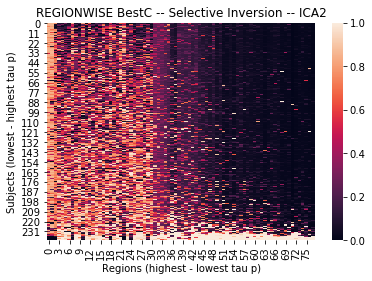

In [248]:
#mm_ndf_simple.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_ica2_simple,copy=True)
sorter.loc[:,'mean'] = mm_ndf_ica2_simple.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_ica2_simple,copy=True)
sorter2.loc['mean',:] = mm_ndf_ica2_simple.mean(axis=0)
sns.heatmap(mm_ndf_ica2_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE BestC -- Selective Inversion -- ICA2')
plt.show()

In [249]:
for col in mm_ndf_ica2_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mm_ndf_ica2_simple[col].mean())

roi_38 [' Putamen'] 0.729993940285
roi_77 [' Putamen'] 0.68542024956
roi_16 [' Pars opercularis'] 0.576379614033
roi_42 [' Cuneus'] 0.502074688797
roi_3 [' Cuneus'] 0.502074688797
roi_33 [' Amygdala'] 0.502074688797
roi_75 [' Hippocampus'] 0.502074688797
roi_35 [' Caudate'] 0.502074688797
roi_15 [' Paracentral '] 0.502074688797
roi_1 [' Caudal anterior cingulate'] 0.502074688797
roi_74 [' Caudate'] 0.502074688797
roi_12 [' Medial orbitofrontal'] 0.502074688797
roi_30 [' Transverse temporal'] 0.502074688797
roi_71 [' Basal forebrain'] 0.502074688797
roi_72 [' Amygdala'] 0.502074688797
roi_17 [' Pars orbitalis'] 0.502074688797
roi_19 [' Pericalcarine'] 0.502074688797
roi_34 [' Hypothalamus???'] 0.502074688797
roi_76 [' Globus Pallidus'] 0.502074688797
roi_32 [' Basal forebrain'] 0.502074688797
roi_54 [' Paracentral '] 0.502074688797
roi_58 [' Pericalcarine'] 0.502074688797
roi_37 [' Globus Pallidus'] 0.502074688797
roi_36 [' Hippocampus'] 0.502074688797
roi_78 [' Thalamus'] 0.50207468879

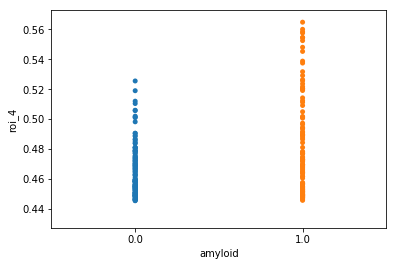

In [253]:
plt.close()
sns.stripplot(x='amyloid',y='roi_4',data=mmdf)
plt.show()

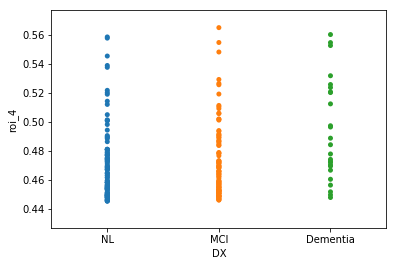

In [255]:
plt.close()
sns.stripplot(x='DX',y='roi_4',data=mmdf)
plt.show()

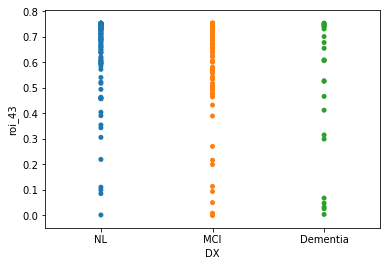

In [260]:
plt.close()
sns.stripplot(x='DX',y='roi_43',data=mm_ndf_simple)
plt.show()

In [262]:
mmdf.values.shape

(241, 80)

In [ ]:
tdf.AGE

In [24]:
for i,row in idf.iterrows():
    age = tdf[(tdf.ID == row['subject']) & (tdf.visit == row['visit'])]['AGE'].values
    if len(age) > 0:
        idf.loc[i,'age'] = age[0]

In [289]:
len([x for x in idf.age if not pandas.notnull(x)])

5

In [293]:
#mmdf.loc[:,'age'] = idf.age
#mmdf.drop(['amyloid','DX'],axis=1,inplace=True)
for col in mmdf.columns[:78]:
    r,p = stats.pearsonr(mmdf.dropna()[col].dropna(),mmdf.dropna()['age'])
    if p<0.05:
        print(col,r,p)

roi_4 -0.134197384865 0.0394023477313
roi_17 -0.174542689024 0.00719240146266
roi_33 -0.152014224255 0.0194661104507
roi_35 0.182551399887 0.00490518251626
roi_37 0.248080621368 0.000117526894158
roi_38 0.144090449775 0.0268721857613
roi_63 -0.128553352143 0.0485433666536
roi_72 -0.130523760449 0.0451692645159
roi_74 0.216304304432 0.000822902565745
roi_76 0.133506907651 0.0404362065356


In [1]:
plabs= {'SUVR_smoothed_prob': pdf, 'smoothed_refnormed_prob': rpdf,
       'voxelwise_2c_mixturemod': mmdf, 'regionwise_2c_mixturemod': mm_ndf}
probs = {}
for nm, df in plabs.items():
    if 'amyloid' in df.columns:
        df.drop('amyloid',axis=1,inplace=True)
    if 'DX' in df.columns:
        df.drop('DX',axis=1,inplace=True)
    df.loc[:,'age'] = idf.age.values
    probs.update({nm: df.dropna()[df.columns[:78]].transpose().values})
    

NameError: name 'pdf' is not defined

In [315]:
probs.update({'ages': df.dropna()['age'].values.reshape(1,len(df.dropna()['age']))})

In [316]:
savemat('/home/users/jvogel/Science/scripts/ESM/2018_03_probs',probs)

In [3]:
eres = loadmat('/home/users/jvogel/Science/scripts/ESM/results/March2018/RW_MMC2_p/ESM_tau_propagation_21-Mar-2018.mat')
eres.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ref_pattern', 'AGEs', 'Conn_Matrix', 'Long_Matrix', 'Nparameters', 'time_range', 'h_integration', 'num_repetitions', 'BETAS0', 'DELTAS0', 'MUS0', 'SIGMAS0', 'Nsubjects', 'model_solutions0', 'model_parameters0', 'model_times0', 'model_CORRs0', 'model_RMSEs0'])

In [13]:
eres['model_solutions0']

array([[ 0.31083754,  0.15770401,  0.95510679, ...,  0.36523652,
         0.60422254,  0.2057083 ],
       [ 0.29402515,  0.19855179,  0.34384081, ...,  0.72203982,
         0.34766883,  0.2018695 ],
       [ 0.14092863,  0.35917053,  0.42966387, ...,  0.43739811,
         0.60505968,  0.16948424],
       ..., 
       [ 0.47837546,  0.50034761,  0.41168439, ...,  0.76808482,
         0.78546411,  0.38384432],
       [ 0.54113996,  0.88349158,  0.6523385 , ...,  0.75628448,
         0.57904571,  0.41955131],
       [ 0.42540458,  0.64602798,  0.45040354, ...,  0.79231316,
         0.57860821,  0.30796862]])

In [9]:
idf.shape

(241, 24)

In [25]:
checkdf = pandas.DataFrame(idf,copy=True)
checkdf.loc[:,'Age'] = idf.age
checkdf.dropna(inplace=True)
checkdf.shape

(236, 25)

In [89]:
eres['model_solutions0'].shape

NameError: name 'eres' is not defined

In [90]:
print(tdf.loc[checkdf.index][['AGE', 'PTGENDER', 'PTEDUCAT']].shape)
print(tdf.loc[checkdf.index][['AGE', 'PTGENDER', 'PTEDUCAT']].dropna().shape)

(236, 3)
(236, 3)


In [91]:
tdf.head()

ID  visit    scandate  1_OffTarget  2_Frontal  3_Temporal  \
0  002_S_0413    1.0  2017-06-21     0.556860   0.755623    0.840567   
1  002_S_1155    1.0  2017-04-24     0.894891   1.092542    1.174600   
2  002_S_1261    1.0  2017-03-15     0.799323   1.041872    1.210508   
3  002_S_1280    1.0  2017-03-13     0.900107   1.001559    1.195115   
4  002_S_4213    1.0  2017-08-17     0.510890   0.772613    0.884422   

   4_Temporoparietal  5_Sensory  Hipp_OffTarget  Hipp_EarlyTau   ...     \
0           0.849258   0.784010        0.993596       0.765412   ...      
1           1.123418   1.053782        1.112060       1.049716   ...      
2           1.140991   1.088301        1.414064       1.268073   ...      
3           1.245342   1.135461        1.310057       1.231244   ...      
4           0.885704   0.835541        0.908119       0.802743   ...      

         ICV DX_fill  av45_status  reference_date  time_difference_days  \
0  1602970.0      NL          0.0      2017-06-15                   6.0   
1        NaN     MCI          0.0      2017-04-20                   4.0   
2  1490670.0     MCI          1.0      2017-03-14                   1.0   
3        NaN      NL          1.0      2017-03-02                  11.0   
4        NaN      NL          0.0      2017-08-10                   7.0   

   whole_hippocampus_AV1451   av45_date  av45_time_difference_days  ADNI_MEM  \
0                  0.901752  2017-06-15                        6.0     1.085   
1                  1.086967  2017-04-20                        4.0     0.396   
2                  1.355302  2017-03-14                        1.0     0.001   
3                  1.278335  2017-03-02                       11.0    -0.277   
4                  0.865705  2015-09-30                      687.0     0.918   

   ADNI_EF  
0    1.982  
1    1.444  
2   -0.116  
3    0.868  
4    1.065  

[5 rows x 37 columns]

In [92]:
checkdf.head()

subject  visit      ica_0      ica_1      ica_2      ica_3      ica_4  \
0  019_S_5242      1  58.150741  84.071448  67.135196  70.255348  65.097879   
1  135_S_5269      1  51.386027  79.054566  76.700124  80.416085  64.897279   
2  137_S_0722      1  49.613785  65.912775  67.630035  81.381512  76.632021   
3  135_S_4281      1  48.569093  59.506516  75.726509  83.472355  81.983699   
4  137_S_0668      1  32.345545  69.714209  63.310211  74.312949  72.737999   

       ica_5      ica_6      ica_7  ...      ica_14     ica_15     ica_16  \
0  79.496528  33.578112  38.062861  ...   75.794132  75.003425  67.672904   
1  76.149806  28.677428  47.164071  ...   83.247122  68.489920  54.177482   
2  66.493914  42.430305  36.277319  ...   90.212382  70.619696  67.498056   
3  64.624340  39.943177  40.019805  ...   85.893665  70.910815  70.223386   
4  70.418551  33.743738  51.328706  ...   70.552607  81.346335  58.958433   

      ica_17     ica_18     ica_19  amyloid_status   DX   age   Age  
0  55.142293  60.393213  54.324704             0.0   NL  67.2  67.2  
1  52.767879  61.405213  54.879092             0.0   NL  64.9  64.9  
2  68.659701  65.684163  64.441323             0.0  MCI  70.1  70.1  
3  57.522236  68.974032  57.628235             0.0  MCI  77.5  77.5  
4  54.571472  76.139060  56.141831             0.0   NL  73.5  73.5  

[5 rows x 26 columns]

In [39]:
## TRYING AGAIN
checkdf = checkdf[['subject','visit','age']]
checkdf.head()

subject  visit   age
0  019_S_5242      1  67.2
1  135_S_5269      1  64.9
2  137_S_0722      1  70.1
3  135_S_4281      1  77.5
4  137_S_0668      1  73.5

In [94]:
checkdf.shape

(236, 3)

In [40]:
tdf.drop_duplicates(['ID','visit'],inplace=True)

In [41]:
gind = []
for i,row in tdf.iterrows():
    if len(checkdf[(checkdf.subject==row['ID']) & (checkdf.visit==row['visit'])]) != 0:
        gind.append(i)
len(gind)

236

In [42]:
addcols = ['ID','visit','AGE', 'PTGENDER', 'PTEDUCAT','DX_fill','av45_status']
demodf = pandas.DataFrame(tdf.loc[gind,addcols])
demodf = demodf[(demodf.DX_fill=='NL') & (demodf.av45_status==0) & (demodf.visit==1)]
demodf.head()

ID  visit   AGE PTGENDER  PTEDUCAT DX_fill  av45_status
0   002_S_0413    1.0  76.3   Female      16.0      NL          0.0
4   002_S_4213    1.0  78.0   Female      14.0      NL          0.0
13  002_S_5178    1.0  68.6     Male      18.0      NL          0.0
20  003_S_4119    1.0  79.3     Male      20.0      NL          0.0
21  003_S_4900    1.0  59.8   Female      18.0      NL          0.0

In [43]:
demodf.shape

(61, 7)

In [8]:
#demodf = pandas.DataFrame(tdf.loc[checkdf.index][['ID','visit','AGE', 'PTGENDER', 'PTEDUCAT','DX_fill','av45_status']
#                                                ],copy=True)
#demodf = demodf[(demodf.DX_fill=='NL') & (demodf.av45_status==0) & (demodf.visit==1)]
#demodf.head()

ID  visit        AGE PTGENDER  PTEDUCAT DX_fill  av45_status
0   002_S_0413    1.0  76.300000   Female      16.0      NL          0.0
4   002_S_4213    1.0  78.000000   Female      14.0      NL          0.0
13  002_S_5178    1.0  68.600000     Male      18.0      NL          0.0
16  002_S_6009    1.0  67.701574      1.0      16.0      NL          0.0
17  002_S_6030    1.0  65.311431      2.0      18.0      NL          0.0

In [99]:
gind = []
for i,row in idf.iterrows():
    if len(demodf[(demodf.ID==row['subject']) & (demodf.visit==row['visit'])]) != 0:
        demodf.loc[demodf[(demodf.ID==row['subject']) & (demodf.visit==row['visit'])].index,'true_indx'] = i

In [100]:
demodf.head()

ID  visit   AGE PTGENDER  PTEDUCAT DX_fill  av45_status  true_indx
0   002_S_0413    1.0  76.3   Female      16.0      NL          0.0       73.0
4   002_S_4213    1.0  78.0   Female      14.0      NL          0.0       98.0
13  002_S_5178    1.0  68.6     Male      18.0      NL          0.0       66.0
20  003_S_4119    1.0  79.3     Male      20.0      NL          0.0      118.0
21  003_S_4900    1.0  59.8   Female      18.0      NL          0.0      117.0

In [44]:
wdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images'
ans = sorted(glob(os.path.join(wdir,'amyloid_negative/smoothed/*')))
aps = sorted(glob(os.path.join(wdir,'amyloid_positive/smoothed/*')))
scans = ans + aps
norm_scans = np.array(scans)[demodf.true_indx.astype(int)]

AttributeError: 'DataFrame' object has no attribute 'true_indx'

In [52]:
norm_scans

array([ '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_736867_birthdate_704902.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_736924_birthdate_706241.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_736846_birthdate_710290.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_737000_birthdate_705723.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_736999_birthdate_713242.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_737019_birthdate_707093.nii',
       '/data1/users/jvogel/ADNI_tau/template_space/tau_images/amyloid_negative/smoothed/sTAU_SUVr_scandate_736951_birthdate_708340.nii',
       '/data1/users/jvogel/ADNI_

In [73]:
os.symlink?

In [53]:
tgt = os.path.join(wdir,'for_norm/')
for i,scan in enumerate(norm_scans):
    sid = demodf.loc[demodf.index[i],'ID']
    vis = demodf.loc[demodf.index[i],'visit']
    stgt = os.path.join(tgt,'%s_v%s_smooth_AV1451_suvr_for_norming.nii'%(sid,vis))
    os.symlink(scan,stgt)

In [49]:
for i,row in demodf.iterrows():
    if row['PTGENDER'] == 'Female':
        demodf.ix[i,'PTGENDER'] = 2
    elif row['PTGENDER'] == 'Male':
        demodf.ix[i,'PTGENDER'] = 1
demodf.loc[:,'PTGENDER'] = pandas.to_numeric(demodf.PTGENDER)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
for i,row in tdf.iterrows():
    if row['PTGENDER'] == 'Female':
        tdf.ix[i,'PTGENDER'] = 2
    elif row['PTGENDER'] == 'Male':
        tdf.ix[i,'PTGENDER'] = 1
tdf.loc[:,'PTGENDER'] = pandas.to_numeric(tdf.PTGENDER)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
[x for x in range(240) if x not in checkdf.index]
#checkdf.index

[83, 106, 128, 218, 221]

In [59]:
demodf.PTEDUCAT.tolist()

[16.0,
 14.0,
 18.0,
 20.0,
 18.0,
 12.0,
 18.0,
 18.0,
 18.0,
 16.0,
 20.0,
 14.0,
 12.0,
 12.0,
 16.0,
 18.0,
 20.0,
 20.0,
 12.0,
 18.0,
 20.0,
 16.0,
 18.0,
 18.0,
 18.0,
 13.0,
 16.0,
 18.0,
 16.0,
 18.0,
 12.0,
 18.0,
 16.0,
 16.0,
 18.0,
 20.0,
 18.0,
 12.0,
 18.0,
 20.0,
 19.0,
 20.0,
 20.0,
 16.0,
 18.0,
 19.0,
 18.0,
 20.0,
 12.0,
 16.0,
 18.0,
 16.0,
 20.0,
 16.0,
 16.0,
 12.0,
 16.0,
 16.0,
 16.0,
 15.0,
 16.0]

In [ ]:
# MAKE SD OF RESIDS
res_is = sorted(glob('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/Res_00*'))
resids = image.load_img(res_is)
sd_of_resids = np.std(resids,axis=3,ddof=1)
nimg = ni.Nifti1Image(sd_of_resids,aff)
nimg.to_filename('for_norm/model/jake_sd_of_resids.nii')

In [64]:
idf.head().index == checkdf.head().index

array([ True,  True,  True,  True,  True], dtype=bool)

In [66]:
i = 0
scan = scans[i]
if i not in checkdf.index:
    pass
sid = idf.loc[i,'subject']
vis = idf.loc[i,'visit']
ginf = idf.index[i]
subvec = tdf[(tdf.ID == sid) & (tdf.visit == vis)]
subvec

ID  visit    scandate  1_OffTarget  2_Frontal  3_Temporal  \
63  019_S_5242    1.0  2015-08-26     0.963693   0.913942    1.044625   

    4_Temporoparietal  5_Sensory  Hipp_OffTarget  Hipp_EarlyTau   ...     \
63            1.00246   0.935451        1.208416        1.00334   ...      

          ICV  DX_fill  av45_status  reference_date  time_difference_days  \
63  1661040.0       NL          0.0      2015-08-13                  13.0   

    whole_hippocampus_AV1451   av45_date  av45_time_difference_days  ADNI_MEM  \
63                  1.125872  2015-08-05                       21.0     2.062   

    ADNI_EF  
63    0.655  

[1 rows x 37 columns]

In [7]:
wscr_dir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/smoothed_wscored_scans'

In [46]:
# MAKE W-SCORE IMAGES

rmean = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/beta_0001.nii.gz').get_data()
rage = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/beta_0002.nii.gz').get_data()
rsex = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/beta_0003.nii.gz').get_data()
redu = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/beta_0004.nii.gz').get_data()
rstd = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/for_norm/model/jake_sd_of_resids.nii.gz'
              ).get_data()
wscr_dir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/smoothed_wscored_scans'
msk = ni.load('/data1/users/jvogel/ADNI_tau/template_space/tau_images/subtract_mask.nii.gz').get_data()

for i,scan in enumerate(scans):
    if i not in checkdf.index:
        continue
    sid = idf.loc[i,'subject']
    vis = idf.loc[i,'visit']
    ginf = idf.index[i]
    subvec = tdf[(tdf.ID == sid) & (tdf.visit == vis)]
    if len(subvec) > 1:
        subvec = subvec.loc[subvec.index[0]]
    agem = np.full_like(rage,subvec['AGE'])
    sexm = np.full_like(rsex,subvec['PTGENDER'])
    edum = np.full_like(redu,subvec['PTEDUCAT'])
    pmap = rmean + (agem * rage) + (sexm * rsex) + (edum * redu)
    jnk = ni.load(scan)
    aff = jnk.affine
    dat = jnk.get_data()
    wscr_mat = (dat - pmap) / rstd
    wscr_mat[msk==0] = 0
    wscr_img = ni.Nifti1Image(wscr_mat,aff)
    flnm = '%s_v%s_smooth_AV1451_wscored_SUVR'%(sid,vis)
    wscr_img.to_filename(os.path.join(wscr_dir,flnm))
    print('finished %s of %s'%(i+1,len(scans)))


In [54]:
i = 0
scan = scans[0]
if i not in checkdf.index:
    print('nooo')
sid = idf.loc[i,'subject']
vis = idf.loc[i,'visit']
ginf = idf.index[i]
subvec = tdf[(tdf.ID == sid) & (tdf.visit == vis)]
if len(subvec) > 1:
    subvec = subvec.loc[subvec.index[0]]
agem = np.full_like(rage,subvec['AGE'])
sexm = np.full_like(rsex,subvec['PTGENDER'])
edum = np.full_like(redu,subvec['PTEDUCAT'])
pmap = rmean + (agem * rage) + (sexm * rsex) + (edum * redu)
jnk = ni.load(scan)
aff = jnk.affine
dat = jnk.get_data()
wscr_mat = (dat - pmap) / rstd
wscr_mat[msk==0] = 0
wscr_img = ni.Nifti1Image(wscr_mat,aff)
flnm = 'TEST_%s_v%s_smooth_AV1451_wscored_SUVR'%(sid,vis)
wscr_img.to_filename(os.path.join(wscr_dir,flnm))
pred_img = ni.Nifti1Image(pmap, aff)
flnm = 'TEST_%s_v%s_prediction_image'%(sid,vis)
pred_img.to_filename(os.path.join(wscr_dir,flnm))

In [52]:
os.path.join(wscr_dir,flnm)

'/data1/users/jvogel/ADNI_tau/template_space/tau_images/smoothed_wscored_scans/TEST_019_S_5242_v1_smooth_AV1451_wscored_SUVR'

In [107]:
subvec.loc[subvec.index[0]]

'127_S_5200'

In [8]:
wscans = sorted(glob(os.path.join(wscr_dir,'*.nii')))
len(wscans)

236

In [11]:
files_in = wscans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_wscore_images/'
out_name = 'smoothed_wscored_SUVR'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 236 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


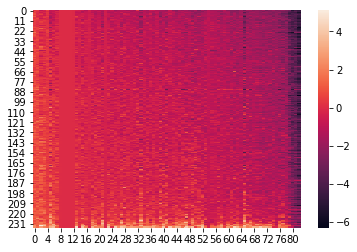

In [14]:
wdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_wscore_images/smoothed_wscored_SUVR_roi_data.csv')
wdf.drop(ndf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(wdf,copy=True)
sorter.loc[:,'mean'] = wdf.mean(axis=1)
sorter2 = pandas.DataFrame(wdf,copy=True)
sorter2.loc['mean',:] = wdf.mean(axis=0)
plt.close()
sns.heatmap(wdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

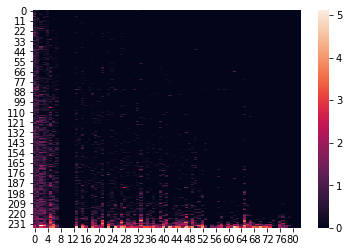

In [15]:
plt.close()
sns.heatmap(wdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values, vmin=0)
plt.show()

In [16]:
jnk = wdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].columns


In [17]:
jnk

Index(['roi_30', 'roi_73', 'roi_63', 'roi_24', 'roi_17', 'roi_4', 'roi_10',
       'roi_19', 'roi_80', 'roi_83', 'roi_82', 'roi_81', 'roi_79', 'roi_59',
       'roi_39', 'roi_16', 'roi_42', 'roi_78', 'roi_68', 'roi_51', 'roi_3',
       'roi_53', 'roi_76', 'roi_6', 'roi_75', 'roi_11', 'roi_15', 'roi_44',
       'roi_9', 'roi_21', 'roi_67', 'roi_66', 'roi_56', 'roi_72', 'roi_61',
       'roi_8', 'roi_57', 'roi_49', 'roi_22', 'roi_34', 'roi_13', 'roi_43',
       'roi_18', 'roi_54', 'roi_62', 'roi_41', 'roi_60', 'roi_5', 'roi_50',
       'roi_47', 'roi_71', 'roi_31', 'roi_52', 'roi_58', 'roi_37', 'roi_40',
       'roi_1', 'roi_48', 'roi_28', 'roi_69', 'roi_27', 'roi_70', 'roi_2',
       'roi_23', 'roi_20', 'roi_33', 'roi_45', 'roi_46', 'roi_65', 'roi_25',
       'roi_64', 'roi_55', 'roi_26', 'roi_29', 'roi_36', 'roi_77', 'roi_7',
       'roi_14', 'roi_12', 'roi_32', 'roi_38', 'roi_74', 'roi_35'],
      dtype='object')

In [20]:
ldf.head()

label                         ROI
0      1   Caudal anterior cingulate
1      2       Caudal middle frontal
2      3                      Cuneus
3      4                   entorinal
4      5                    fusiform

In [21]:
list(zip(range(len(jnk)),[ldf.loc[int(x.split('_')[-1])]['ROI'] for x in jnk if int(x.split('_')[-1]) < 79 ]))

[(0, ' Insula'),
 (1, ' Caudate'),
 (2, ' Rostral middle frontal'),
 (3, ' Rostral middle frontal'),
 (4, ' Pars triangularis'),
 (5, ' fusiform'),
 (6, ' Lingual gyrus'),
 (7, ' Postcentral'),
 (8, ' Posterior cingulate'),
 (9, ' Caudal anterior cingulate'),
 (10, ' Pars orbitalis'),
 (11, ' entorinal'),
 (12, ' L Cerebellum'),
 (13, ' Transverse temporal'),
 (14, ' Middle temporal'),
 (15, ' entorinal'),
 (16, ' Paracentral '),
 (17, ' Putamen'),
 (18, ' Inferior temporal'),
 (19, ' Globus Pallidus'),
 (20, ' Medial orbitofrontal'),
 (21, ' Pars opercularis'),
 (22, ' Inferior parietal'),
 (23, ' Lateral orbitofronal'),
 (24, ' Precentral'),
 (25, ' Supramarginal'),
 (26, ' Superior Temporal'),
 (27, ' Pars triangularis'),
 (28, ' Hypothalamus'),
 (29, ' Precuneus'),
 (30, ' Lateral Occipital'),
 (31, ' Pericalcarine'),
 (32, ' Lingual gyrus'),
 (33, ' Precuneus'),
 (34, ' Caudate'),
 (35, ' Parahippocampal'),
 (36, ' fusiform'),
 (37, ' Pericalcarine'),
 (38, ' Pars opercularis'),
 

In [58]:
#ndfs = {'suvr': ndf, 'mixture_model -- REGIONWISE 2Comp': mm_ndf_simple, 
#        'mixture_model -- REGIONWISE-complicated': mm_ndf, 'mixture_model -- REGIONWISE-BestComponent': mm_ndf_alt,
#        'mixture_model -- REGIONWISE-BestComponent_Inverted': mm_ndf_alt_inv,
#        'w-score': wdf, 'w-score MM RW-complicated': mm_wdf}
#ndfs = {'w-score': wdf,'suvr': ndf }
#ndfs = {'w-score': wdf, 'w-score MM RW-complicated': mm_wdf, 'w-score forced 2c': mm2C_wdf}

ndfs = {'masked smoothed data': mdf, 'MM RW-complicated masked smoothed data': mm_mdf, 'suvr': ndf}

suvr = []
mm = []
gind = checkdf.index
for k,df in ndfs.items():
    if 'w-score' in k:
        df.loc[:,'amyloid'] = idf.loc[gind,'amyloid_status'].values
        df.loc[:,'DX'] = idf.loc[gind,'DX'].values
    else:
        df.loc[:,'amyloid'] = idf.amyloid_status.values
        df.loc[:,'DX'] = idf.DX.values
    print('for',k)
    thits = []
    fhits = []
    for i,col in enumerate(df.columns[:78]):
        t,p = stats.ttest_ind(df[df.amyloid==0][col],
                            df[df.amyloid==1][col])
        if p < 0.05:
            thits.append(i)
            if k == 'suvr':
                suvr.append([i,t])
            elif k == 'mixture_model':
                mm.append([i,t])
        f,p2 = stats.f_oneway(df[df.DX=='NL'][col],
                              df[df.DX=='MCI'][col],
                              df[df.DX=='Dementia'][col])
        if p2 < 0.05:
            fhits.append(i)
    print('%s regions were different by amyloid group'%len(thits))
    #print(thits)
    print('%s regions were different by disease group'%len(fhits))
    #print(fhits)

for masked smoothed data


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


58 regions were different by amyloid group
53 regions were different by disease group
for MM RW-complicated masked smoothed data
28 regions were different by amyloid group
28 regions were different by disease group
for suvr
47 regions were different by amyloid group
52 regions were different by disease group


In [95]:
#[ldf.loc[int(x.split('_')[-1])]['ROI'] for x in wdf.columns[:78]]
wdf.head()

roi_1     roi_2     roi_3     roi_4     roi_5     roi_6     roi_7  \
0  0.041775  0.123659  0.291077  0.143220 -0.014680  0.213964 -0.122884   
1  0.104705  0.082648  0.285772  0.169335  0.086547  0.249776  0.041104   
2  0.013322 -0.047667  0.149535 -0.124351 -0.097297  0.092407 -0.065060   
3  0.037263 -0.042025  0.173866  0.180070  0.130910  0.004957 -0.122272   
4 -0.013829 -0.043229  0.372368  0.272850 -0.013078  0.274197 -0.053412   

      roi_8     roi_9    roi_10 ...     roi_76    roi_77    roi_78    roi_79  \
0 -0.013735  0.105831  0.240002 ...  -0.187891 -0.424443 -0.001132 -0.004597   
1  0.098745  0.058708  0.266814 ...  -0.115866 -0.217917  0.120719  0.003427   
2 -0.032884  0.086290  0.063958 ...  -0.116847 -0.292932  0.023620 -0.002692   
3  0.124827  0.012160  0.244925 ...  -0.082381 -0.162562  0.041074  0.007559   
4  0.116445  0.101804  0.252816 ...  -0.197214 -0.399935  0.030374 -0.000684   

     roi_80    roi_81    roi_82        roi_83  amyloid   DX  
0  0.000946 -0.033344 -0.018232 -2.348689e-06      0.0   NL  
1  0.008691 -0.014578 -0.012704  1.615928e-06      0.0   NL  
2  0.008459 -0.021260 -0.015007  3.713001e-07      0.0  MCI  
3  0.011061 -0.012027 -0.010174  2.674495e-06      0.0  MCI  
4  0.007130 -0.015728 -0.009906 -1.137022e-06      0.0   NL  

[5 rows x 85 columns]

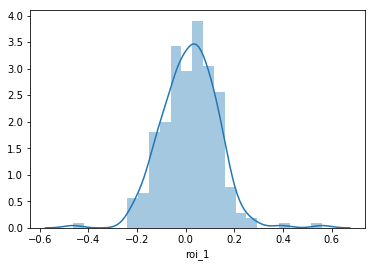

In [204]:
col = 'roi_1'
plt.close()
sns.distplot(wdf[col])
plt.show()

In [205]:
bic1 = GMM1.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
bic2 = GMM2.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
bic1, bic2

(-343.0086099600781, -325.44246504283518)

In [206]:
GMM3 = GaussianMixture(n_components=3,random_state=123)
bic3 = GMM3.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
bic3

-332.61255181597954

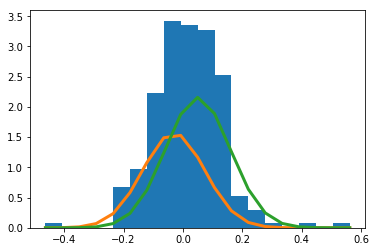

In [207]:
mmod = GMM2
m1, m2 = mmod.means_
w1, w2 = mmod.weights_
c1, c2 = mmod.covariances_
plt.close()
histdist = plt.hist(wdf[col], 18, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plt.show()

In [212]:
GaussianMixture?

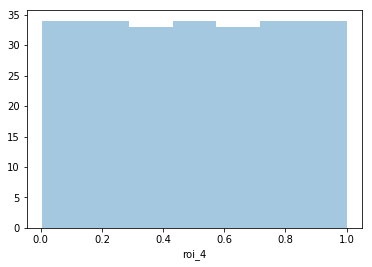

In [158]:
plt.close()
sns.distplot(mm_wdf[col],kde=False)
plt.show()

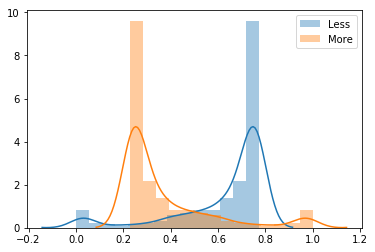

In [167]:
plt.close()
sns.distplot(GMM2.fit(wdf[col].values.reshape(-1,1)
                                    ).predict_proba(wdf[col].values.reshape(-1,1))[:,1],label='Less')
sns.distplot(GMM2.fit(wdf[col].values.reshape(-1,1)
                                    ).predict_proba(wdf[col].values.reshape(-1,1))[:,0],label='More')
plt.legend()
plt.show()

In [164]:
labs = GMM2.fit(wdf[col].values.reshape(-1,1)).predict(wdf[col].values.reshape(-1,1))
numb = len([x for x in labs if x == 1])/len(wdf[col])
wdf[col].values[labs==0].mean() > wdf[col].values[labs==1].mean()

True

In [126]:
ldf.loc[int('roi_0'.split('_')[-1])]

label                             1
ROI       Caudal anterior cingulate
Name: 0, dtype: object

In [127]:
ldf.loc[int('roi_0'.split('_')[-1])]['ROI']

' Caudal anterior cingulate'

In [134]:
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in wdf.columns:
    cnm = ldf[ldf.label==int(col.split('_')[-1])]['ROI'].values[0]
    bic1 = GMM1.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
    if bic1 < bic2:
        print(cnm,' --  one component solution')
    else:
        labs = GMM2.fit(wdf[col].values.reshape(-1,1)).predict(wdf[col].values.reshape(-1,1))
        numb = len([x for x in labs if x == 1])/len(wdf[col])
        print(cnm,' --  number of 2nd component subs:',numb)
        if wdf[col].values[labs==0].mean() > wdf[col].values[labs==1].mean():
            print('WRONG WAY!!!')

 Caudal anterior cingulate  --  one component solution
 Caudal middle frontal  --  number of 2nd component subs: 0.0423728813559322
 Cuneus  --  one component solution
 entorinal  --  one component solution
 fusiform  --  number of 2nd component subs: 0.0847457627118644
 Inferior parietal  --  number of 2nd component subs: 0.029661016949152543
 Inferior temporal  --  number of 2nd component subs: 0.0847457627118644
 Isthmus cingulate  --  number of 2nd component subs: 0.2711864406779661
 Lateral Occipital  --  number of 2nd component subs: 0.0211864406779661
 Lateral orbitofronal  --  number of 2nd component subs: 0.9745762711864406
WRONG WAY!!!
 Lingual gyrus  --  number of 2nd component subs: 0.029661016949152543
 Medial orbitofrontal  --  number of 2nd component subs: 0.16101694915254236
 Middle temporal  --  number of 2nd component subs: 0.1059322033898305
 Parahippocampal  --  number of 2nd component subs: 0.8940677966101694
WRONG WAY!!!
 Paracentral   --  one component solution
 

IndexError: index 0 is out of bounds for axis 0 with size 0

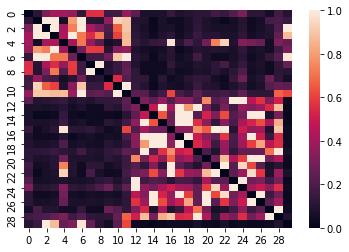

In [97]:
tmat = connmat['Map']
plt.close()
sns.heatmap(np.array([thing[gcols] for thing in tmat[gcols]]))
plt.show()

In [95]:
tmat[[thing[gcols] for thing in tmat[gcols]]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [71]:
mm_mdf.shape

(241, 80)

In [102]:
gcols = [x for x in range(mm_mdf.shape[-1]) if mm_mdf[mm_mdf.columns[x]].mean()!=0]
print(len(gcols))
mm_mdf2 = mm_mdf[mm_mdf.columns[gcols]]
mm_mdf2.shape

30


(241, 30)

In [ ]:
connmat = loadmat('/home/users/jvogel/Science/scripts/ESM/connectivity_CMU60DSI/Matrix_ACP.mat')
connmat['amymask_Map'] = np.array([thing[gcols] for thing in connmat['Map'][gcols]])
savemat('/home/users/jvogel/Science/scripts/ESM/connectivity_CMU60DSI/Matrix_ACP_amymask.mat', connmat)
dmat = loadmat('/home/users/jvogel/Science/scripts/ESM/connectivity_CMU60DSI/Matrix_LONG.mat')
dmat['amymask_Map'] = np.array([thing[gcols] for thing in dmat['Map'][gcols]])
savemat('/home/users/jvogel/Science/scripts/ESM/connectivity_CMU60DSI/Matrix_LONG_amymask.mat', dmat)

In [103]:
plabs= {'W_MM_2C': mm_wdf, 'AmyMasked_MM2C': mm_mdf, 'AmyMasked_MM2C_cut': mm_mdf2}
probs = {}
for nm, df in plabs.items():
    if 'amyloid' in df.columns:
        df.drop('amyloid',axis=1,inplace=True)
    if 'DX' in df.columns:
        df.drop('DX',axis=1,inplace=True)
    if nm == 'W_MM_2C':
        df.loc[:,'age'] = idf.loc[gind,'age'].values
    else:
        df.loc[:,'age'] = idf.age.values
    probs.update({nm: df.dropna()[df.columns[:78]].transpose().values})
probs.update({'ages': df.dropna()['age'].values.reshape(1,len(df.dropna()['age']))})
savemat('/home/users/jvogel/Science/scripts/ESM/2018_04_probs_set2',probs)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [108]:
probs['AmyMasked_MM2C_cut'].shape

(30, 236)

In [110]:
mm_mdf2.columns

Index(['roi_2', 'roi_4', 'roi_5', 'roi_7', 'roi_8', 'roi_13', 'roi_14',
       'roi_27', 'roi_29', 'roi_32', 'roi_33', 'roi_36', 'roi_41', 'roi_44',
       'roi_45', 'roi_46', 'roi_47', 'roi_48', 'roi_52', 'roi_53', 'roi_59',
       'roi_60', 'roi_62', 'roi_64', 'roi_65', 'roi_66', 'roi_68', 'roi_72',
       'roi_75', 'age'],
      dtype='object')

In [29]:
mm_wdf = pandas.DataFrame(index = wdf.index, columns = wdf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in wdf:
    cnm = ldf[ldf.label==int(col.split('_')[-1])]['ROI'].values[0]
    bic1 = GMM1.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(wdf[col].values.reshape(-1,1)).bic(wdf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_wdf.loc[:,col] = ed.ECDF(wdf[col].values)(wdf[col])
        print('%s : monomial distribution'%(cnm))
    else:
        mod = GMM2.fit(wdf[col].values.reshape(-1,1))
        labs = mod.predict(wdf[col].values.reshape(-1,1))
        numb = len([x for x in labs if x == 1])/len(wdf[col])
        if wdf[col].values[labs==0].mean() > wdf[col].values[labs==1].mean() and numb > 0.5:
            print('%s -- label reversed -- perc. positive = %s'%(cnm,1-numb))
            mm_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,0]
        elif wdf[col].values[labs==0].mean() < wdf[col].values[labs==1].mean() and numb < 0.5:
            mm_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,1]
            print('%s: perc. positive = %s'%(cnm,numb))
        else:
            mm_wdf.loc[:,col] = ed.ECDF(wdf[col].values)(wdf[col])
            print('%s: **UNEXPECTED DISTRIBUTION, USING ECDF'%cnm)
              

 Caudal anterior cingulate: perc. positive = 0.01694915254237288
 Caudal middle frontal: perc. positive = 0.0423728813559322
 Cuneus : monomial distribution
 entorinal : monomial distribution
 fusiform: perc. positive = 0.07203389830508475
 Inferior parietal: perc. positive = 0.03389830508474576
 Inferior temporal: perc. positive = 0.09322033898305085
 Isthmus cingulate: perc. positive = 0.3008474576271186
 Lateral Occipital: perc. positive = 0.025423728813559324
 Lateral orbitofronal -- label reversed -- perc. positive = 0.025423728813559365
 Lingual gyrus: perc. positive = 0.038135593220338986
 Medial orbitofrontal: perc. positive = 0.1228813559322034
 Middle temporal: perc. positive = 0.1016949152542373
 Parahippocampal -- label reversed -- perc. positive = 0.07627118644067798
 Paracentral : perc. positive = 0.03389830508474576
 Pars opercularis: perc. positive = 0.025423728813559324
 Pars orbitalis -- label reversed -- perc. positive = 0.1271186440677966
 Pars triangularis: perc. p

IndexError: index 0 is out of bounds for axis 0 with size 0

In [31]:
mm_wdf.drop(mm_wdf.columns[78:],axis=1,inplace=True)

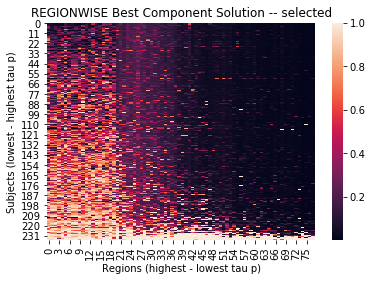

In [32]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_wdf,copy=True)
sorter.loc[:,'mean'] = mm_wdf.mean(axis=1)
sorter2 = pandas.DataFrame(mm_wdf,copy=True)
sorter2.loc['mean',:] = mm_wdf.mean(axis=0)
sns.heatmap(mm_wdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution -- selected')
plt.show()

In [33]:
mm2C_wdf = pandas.DataFrame(index = wdf.index, columns = wdf.columns)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in wdf:
    cnm = ldf[ldf.label==int(col.split('_')[-1])]['ROI'].values[0]
    mod = GMM2.fit(wdf[col].values.reshape(-1,1))
    labs = mod.predict(wdf[col].values.reshape(-1,1))
    numb = len([x for x in labs if x == 1])/len(wdf[col])
    if wdf[col].values[labs==0].mean() > wdf[col].values[labs==1].mean() and numb > 0.5:
        print('%s -- label reversed -- perc. positive = %s'%(cnm,1-numb))
        mm2C_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,0]
    elif wdf[col].values[labs==0].mean() < wdf[col].values[labs==1].mean() and numb < 0.5:
        mm2C_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,1]
        print('%s: perc. positive = %s'%(cnm,numb))
    else:
        print('%s ***PROBLEM***, mean of 0s = %s, mean of 1s = %s, perc of 1s = %s'%(
                                                                cnm, wdf[col].values[labs==0].mean(),
                                                                wdf[col].values[labs==1].mean(), numb
                                                                                        ))

 Caudal anterior cingulate: perc. positive = 0.01694915254237288
 Caudal middle frontal: perc. positive = 0.0423728813559322
 Cuneus: perc. positive = 0.3474576271186441
 entorinal -- label reversed -- perc. positive = 0.14830508474576276
 fusiform: perc. positive = 0.07203389830508475
 Inferior parietal: perc. positive = 0.03389830508474576
 Inferior temporal: perc. positive = 0.09322033898305085
 Isthmus cingulate: perc. positive = 0.3008474576271186
 Lateral Occipital: perc. positive = 0.025423728813559324
 Lateral orbitofronal -- label reversed -- perc. positive = 0.025423728813559365
 Lingual gyrus: perc. positive = 0.038135593220338986
 Medial orbitofrontal: perc. positive = 0.1228813559322034
 Middle temporal: perc. positive = 0.1016949152542373
 Parahippocampal -- label reversed -- perc. positive = 0.07627118644067798
 Paracentral : perc. positive = 0.03389830508474576
 Pars opercularis: perc. positive = 0.025423728813559324
 Pars orbitalis -- label reversed -- perc. positive =

IndexError: index 0 is out of bounds for axis 0 with size 0

In [192]:
mm2C_wdf.dropna(axis=1)

roi_2     roi_3     roi_4     roi_5     roi_6     roi_7     roi_8  \
0    0.140388  0.653458  0.237344  0.039913  0.014538  0.055432  0.167687   
1    0.069060  0.633044  0.250397  0.080181  0.019387  0.232574  0.519275   
2    0.018290  0.238480  0.464270  0.044826  0.010191  0.071826  0.153927   
3    0.018732  0.281314  0.257579  0.141018  0.014362  0.055495  0.674843   
4    0.018632  0.901023  0.373523  0.040070  0.024720  0.078464  0.624687   
5    0.026308  0.149925  0.727341  0.046209  0.011350  0.064182  0.155431   
6    0.020617  0.147668  0.598989  0.050843  0.011456  0.067158  0.147776   
7    0.071875  0.360856  0.976936  0.997833  0.545197  0.998692  0.999864   
8    1.000000  0.957260  0.693904  0.999971  1.000000  1.000000  0.999576   
9    0.131110  0.193023  0.542932  0.043883  0.032542  0.136457  0.892813   
10   0.094009  0.221352  0.605998  0.047555  0.039352  0.126301  0.913557   
11   0.153222  0.777759  0.250030  0.153066  0.029460  0.320504  0.440221   
12   0.065172  0.711832  0.236906  0.156709  0.019984  0.304323  0.407595   
13   0.075789  0.230498  0.228341  0.092853  0.010701  0.060518  0.147549   
14   0.999670  0.159920  0.380310  0.049239  0.012518  0.054556  0.148522   
15   0.017889  0.170866  0.289826  0.058782  0.012203  0.083486  0.519892   
16   0.018937  0.158280  0.244106  0.049242  0.010189  0.059701  0.315373   
17   0.021992  0.219196  0.228488  0.038774  0.074651  0.055101  0.209819   
18   0.046007  0.187380  0.468531  0.057537  0.082980  0.199128  0.229302   
19   0.021912  0.167739  0.276992  0.046321  0.033774  0.086292  0.590519   
20   0.020290  0.212254  0.230695  0.040161  0.016300  0.055862  0.236736   
21   0.078799  0.248453  0.247276  0.050244  0.018372  0.081691  0.198877   
22   0.019984  0.873495  0.988713  0.999965  0.040777  0.994638  0.954044   
23   0.018623  0.820750  0.987427  0.999984  0.048809  0.995910  0.939694   
24   0.057245  0.169115  0.292221  0.219565  0.996969  0.202477  0.960785   
25   0.019514  0.199862  0.612056  0.057887  0.034365  0.070503  0.384550   
26   0.026196  0.342236  0.237988  0.039456  0.019695  0.054468  0.306411   
27   0.023807  0.196212  0.300192  0.038938  0.012460  0.065247  0.148340   
28   0.019789  0.147530  0.229048  0.050783  0.012197  0.078241  0.173764   
29   0.018275  0.189391  0.232709  0.045553  0.010104  0.055631  0.187351   
..        ...       ...       ...       ...       ...       ...       ...   
206  0.019992  0.156605  0.273429  0.053715  0.014780  0.054864  0.147234   
207  0.075593  0.353252  0.253520  0.150904  0.011217  0.082600  0.958960   
208  0.080372  0.324952  0.316216  0.125866  0.011151  0.063564  0.948641   
209  0.018646  0.597040  0.345067  0.090261  0.010531  0.057429  0.896611   
210  0.019457  0.829509  0.344434  0.101111  0.010540  0.057419  0.869821   
211  0.021916  0.181955  0.235924  0.038883  0.011681  0.056462  0.157654   
212  0.017897  0.165191  0.229498  0.038996  0.012185  0.056356  0.152774   
213  0.017794  0.186308  0.255973  0.045591  0.011076  0.075740  0.152416   
214  0.019460  0.183260  0.244167  0.061861  0.010899  0.085708  0.147914   
215  0.017974  0.561778  0.247405  0.043541  0.014391  0.084417  0.251721   
216  0.019870  0.851492  0.230927  0.970508  0.027257  0.334898  0.820040   
217  0.016921  0.830573  0.260738  0.984677  0.022707  0.247924  0.449101   
218  0.019960  0.156938  0.634371  0.054001  0.020925  0.054569  0.148484   
219  0.018535  0.147826  0.286985  0.054063  0.012079  0.068310  0.229994   
220  0.022483  0.150704  0.230106  0.930848  0.025968  0.208674  0.630634   
221  0.017289  0.281578  0.334566  0.039789  0.011924  0.056679  0.147441   
222  0.185396  0.606661  0.944065  0.758862  0.025694  0.483866  0.998801   
223  0.017013  0.262865  0.573407  0.040639  0.010115  0.054970  0.751771   
224  0.961179  0.731444  0.929264  0.209109  0.061231  0.161470  0.999941   
225  0.018701  0.153447  0.235858  0.038742  0.010624  0.055931  0.149928   
226 

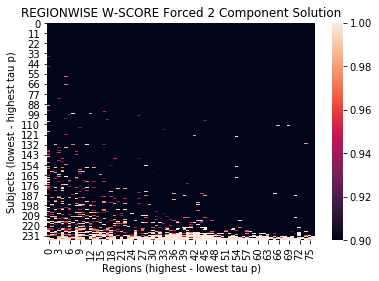

In [35]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
#mm2C_wdf = mm2C_wdf.dropna(axis=1)

plt.close()
sorter = pandas.DataFrame(mm2C_wdf,copy=True)
sorter.loc[:,'mean'] = mm2C_wdf.mean(axis=1)
sorter2 = pandas.DataFrame(mm2C_wdf,copy=True)
sorter2.loc['mean',:] = mm2C_wdf.mean(axis=0)
sns.heatmap(mm2C_wdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values,
           vmin=0.9)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE W-SCORE Forced 2 Component Solution')
plt.show()

In [64]:
files_in = s_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/smoothed_amyloid_masked_images/'
out_name = 'smoothed_SUVR'
a_mask = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/tau_positive_mask.nii.gz'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True, msk=a_mask,
                 orig_atlas=True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


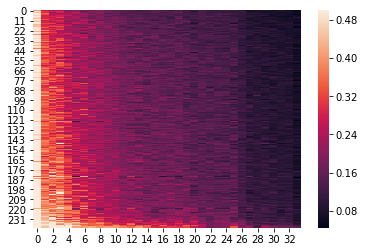

In [55]:
mdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/smoothed_amyloid_masked_images/smoothed_SUVR_roi_data.csv')
mdf.drop(mdf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(mdf,copy=True)
sorter.loc[:,'mean'] = mdf.mean(axis=1)
sorter2 = pandas.DataFrame(mdf,copy=True)
sorter2.loc['mean',:] = mdf.mean(axis=0)
plt.close()
sns.heatmap(mdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns[:34]].values,
           vmax = 0.5)
plt.show()

In [ ]:
mm2C_wdf = pandas.DataFrame(index = wdf.index, columns = wdf.columns)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in wdf:
    cnm = ldf[ldf.label==int(col.split('_')[-1])]['ROI'].values[0]
    mod = GMM2.fit(wdf[col].values.reshape(-1,1))
    labs = mod.predict(wdf[col].values.reshape(-1,1))
    numb = len([x for x in labs if x == 1])/len(wdf[col])
    if wdf[col].values[labs==0].mean() > wdf[col].values[labs==1].mean() and numb > 0.5:
        print('%s -- label reversed -- perc. positive = %s'%(cnm,1-numb))
        mm2C_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,0]
    elif wdf[col].values[labs==0].mean() < wdf[col].values[labs==1].mean() and numb < 0.5:
        mm2C_wdf.loc[:,col] = mod.predict_proba(wdf[col].values.reshape(-1,1))[:,1]
        print('%s: perc. positive = %s'%(cnm,numb))
    else:
        print('%s ***PROBLEM***, mean of 0s = %s, mean of 1s = %s, perc of 1s = %s'%(
                                                                cnm, wdf[col].values[labs==0].mean(),
                                                                wdf[col].values[labs==1].mean(), numb
                                                                                        ))

GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
mm_mdf = pandas.DataFrame(index = mdf.index, columns = mdf.columns)
for col in mdf.columns:
    cnm = ldf[ldf.label==int(col.split('_')[-1])]['ROI'].values[0]
    if mdf[col].mean() < 0.10:
        print(cnm,' -- ZERO')
        mm_mdf.loc[:,col] = np.zeros(len(mdf))
        continue
    bic1 = GMM1.fit(mdf[col].values.reshape(-1,1)).bic(mdf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(mdf[col].values.reshape(-1,1)).bic(mdf[col].values.reshape(-1,1))
        #if bic1 < bic2:
    if bic2 - bic1 > 5:
        print(cnm,' --  one component solution')
    else:
        mod = GMM2.fit(mdf[col].values.reshape(-1,1))
        labs = mod.predict(mdf[col].values.reshape(-1,1))
        numb = len([x for x in labs if x == 1])/len(mdf[col])
        
        if mdf[col].values[labs==0].mean() > mdf[col].values[labs==1].mean() and numb > 0.5:
            print('%s -- label reversed -- perc. positive = %s'%(cnm,1-numb))
            mm_mdf.loc[:,col] = mod.predict_proba(mdf[col].values.reshape(-1,1))[:,0]
        elif mdf[col].values[labs==0].mean() < mdf[col].values[labs==1].mean() and numb < 0.5:
            mm_mdf.loc[:,col] = mod.predict_proba(mdf[col].values.reshape(-1,1))[:,1]
            print('%s: perc. positive = %s'%(cnm,numb))
        else:
            print(cnm,'***ERRORRRRR***')

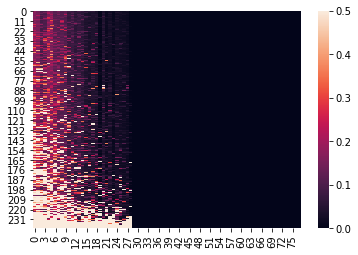

In [57]:
sorter = pandas.DataFrame(mm_mdf,copy=True)
sorter.loc[:,'mean'] = mm_mdf.mean(axis=1)
sorter2 = pandas.DataFrame(mm_mdf,copy=True)
sorter2.loc['mean',:] = mm_mdf.mean(axis=0)
plt.close()
sns.heatmap(mm_mdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values,
           vmax = 0.5)
plt.show()

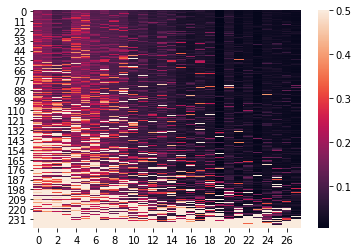

In [63]:
sorter = pandas.DataFrame(mm_mdf,copy=True)
sorter.loc[:,'mean'] = mm_mdf.mean(axis=1)
sorter2 = pandas.DataFrame(mm_mdf,copy=True)
sorter2.loc['mean',:] = mm_mdf.mean(axis=0)
plt.close()
sns.heatmap(mm_mdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns[:28]].values,
           vmax = 0.5)
plt.show()

In [74]:
list(zip(range(len(mm_mdf)),[ldf[ldf.label==int(x.split('_')[-1])
    ]['ROI'].values[0] for x in sorter2.sort_values('mean',axis=1,ascending=False).columns]))

[(0, ' Hippocampus'),
 (1, ' Amygdala'),
 (2, ' Hippocampus'),
 (3, ' entorinal'),
 (4, ' Caudal middle frontal'),
 (5, ' Isthmus cingulate'),
 (6, ' Amygdala'),
 (7, ' Basal forebrain'),
 (8, ' Isthmus cingulate'),
 (9, ' Rostral middle frontal'),
 (10, ' Lateral Occipital'),
 (11, ' Precuneus'),
 (12, ' Middle temporal'),
 (13, ' Superior frontal'),
 (14, ' Supramarginal'),
 (15, ' Supramarginal'),
 (16, ' Inferior temporal'),
 (17, ' Postcentral'),
 (18, ' Middle temporal'),
 (19, ' Inferior parietal'),
 (20, ' fusiform'),
 (21, ' Superior parietal'),
 (22, ' Parahippocampal'),
 (23, ' Inferior temporal'),
 (24, ' Superior parietal'),
 (25, ' Caudal middle frontal'),
 (26, ' Posterior cingulate'),
 (27, ' Parahippocampal'),
 (28, ' fusiform'),
 (29, ' Pars opercularis'),
 (30, ' Medial orbitofrontal'),
 (31, ' Lingual gyrus'),
 (32, ' Paracentral '),
 (33, ' Caudal anterior cingulate'),
 (34, ' Pars orbitalis'),
 (35, ' Pars triangularis'),
 (36, ' Pericalcarine'),
 (37, ' Lateral o

# TO DO
* The above approach seems promising. Perhaps also try it with the w-score images (IF YOU CAN FIX IT)
* Run the ESM with this data
* Continue exploring

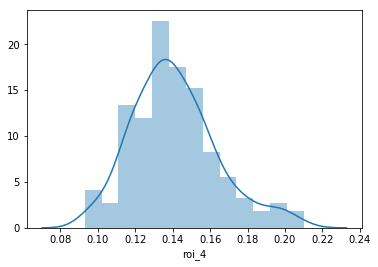

In [49]:
col = 'roi_4'
plt.close()
sns.distplot(mdf[col])
plt.show()

In [50]:
bic1 = GMM1.fit(mdf[col].values.reshape(-1,1)).bic(mdf[col].values.reshape(-1,1))
bic2 = GMM2.fit(mdf[col].values.reshape(-1,1)).bic(mdf[col].values.reshape(-1,1))
GMM3 = GaussianMixture(n_components=3,random_state=123)
bic3 = GMM3.fit(mdf[col].values.reshape(-1,1)).bic(mdf[col].values.reshape(-1,1))
bic1, bic2, bic3


(-1129.456388058406, -1128.7848263199244, -1115.0846042117528)

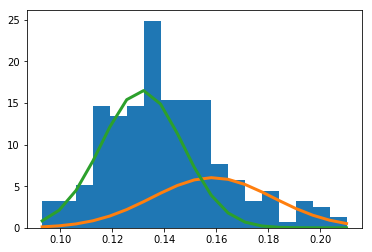

In [51]:
mmod = GaussianMixture(n_components=2,random_state=123).fit(mdf[col].values.reshape(-1,1))
m1, m2 = mmod.means_
w1, w2 = mmod.weights_
c1, c2 = mmod.covariances_
plt.close()
histdist = plt.hist(mdf[col], 18, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plt.show()


In [ ]:
plt.close()
sns.distplot(GMM2.fit(wdf[col].values.reshape(-1,1)
                                    ).predict_proba(wdf[col].values.reshape(-1,1))[:,1],label='Less')
sns.distplot(GMM2.fit(wdf[col].values.reshape(-1,1)
                                    ).predict_proba(wdf[col].values.reshape(-1,1))[:,0],label='More')
plt.legend()
plt.show()